# Data Storm 6.0

## Importing Required Libraries and Loading Data

In [150]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clusters/agent_clusters.csv
/kaggle/input/data-storm-6-0/sample_submission_storming_round.csv
/kaggle/input/data-storm-6-0/train_storming_round.csv
/kaggle/input/data-storm-6-0/test_storming_round.csv


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [152]:
df = pd.read_csv('/kaggle/input/data-storm-6-0/train_storming_round.csv')
test = pd.read_csv('/kaggle/input/data-storm-6-0/test_storming_round.csv')

In [153]:
df.shape

(15308, 23)

In [154]:
test.shape

(914, 23)

In [155]:
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 10)

df.head(10)

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   455ca878         45         2/1/2021                9/1/2023   
1       2   c823ce77         48         4/1/2022                2/1/2024   
2       3   62154055         53         5/1/2020                9/1/2023   
3       4   c58bfa6e         44         7/1/2019                3/1/2022   
4       5   b1e5f770         20         9/1/2020                2/1/2023   
5       6   b9c2f37a         32        10/1/2019                8/1/2022   
6       7   b09dd216         41         3/1/2022                1/1/2023   
7       8   224be699         59         7/1/2020                7/1/2023   
8       9   003c1999         35         8/1/2020               12/1/2022   
9      10   d7f98932         41         3/1/2020                5/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   1/1/2023                             3                              6   
1   1/1/2023                             1                              4   
2   1/1/2023                             3                              5   
3   1/1/2023                             1                              0   
4   1/1/2023                             0                              6   
5   1/1/2023                             2                              2   
6   1/1/2023                             1                              6   
7   1/1/2023                             3                              0   
8   1/1/2023                             2                              2   
9   1/1/2023                             0                              6   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                              2               12  ...                  9   
1                             12               21  ...                 14   
2                              5               17  ...                 14   
3                             12               17  ...                 11   
4                             10               17  ...                 13   
5                             16               24  ...                 13   
6                              4               12  ...                 14   
7                              3                8  ...                 16   
8                              0                8  ...                  2   
9                              8               15  ...                 14   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             3                              4   
1                             4                              3   
2                             3                              7   
3                             2                              2   
4                             3                             10   
5                             4                              0   
6                             2                              7   
7                             4                              2   
8                             2                              2   
9                             3                              6   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              8                15                 0   
1                             10                17                25   
2                             11                21                26   
3                              9                13                18   
4                              6                19                20   
5                              9                13                28   
6                             13                22                17   
7                             11                17                16   
8                              1                 5                 0   
9                      

In [156]:
test.head(10)

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   de9a845f         43         6/1/2020                4/1/2022   
1       2   1450745b         32         5/1/2019                8/1/2022   
2       3   5c4dd08c         52         6/1/2019                6/1/2022   
3       4   3c7a8b50         21         5/1/2021                9/1/2023   
4       5   3dd0c2a1         33         9/1/2022               11/1/2023   
5       6   c698da4c         39         3/1/2022               10/1/2023   
6       7   89a8cb39         42         6/1/2019                2/1/2024   
7       8   1de378ca         55         1/1/2022                7/1/2022   
8       9   c158de38         43        11/1/2020                6/1/2023   
9      10   fe7e49da         53         5/1/2024                4/1/2024   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   9/1/2024                             0                              2   
1   9/1/2024                             1                              3   
2   9/1/2024                             2                              6   
3   9/1/2024                             1                              6   
4   9/1/2024                             0                              4   
5   9/1/2024                             0                              1   
6   9/1/2024                             1                              2   
7   9/1/2024                             1                              0   
8   9/1/2024                             1                              4   
9   9/1/2024                             0                              3   

   unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                             12               17  ...                 14   
1                              4               13  ...                 12   
2                             17               27  ...                 21   
3                             17               26  ...                 15   
4                              2                8  ...                 14   
5                              6               10  ...                 10   
6                             17               24  ...                 23   
7                             14               20  ...                 17   
8                             15               21  ...                 15   
9                              2               10  ...                 17   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             6                              9   
1                             2                              2   
2                             5                              6   
3                             3                              2   
4                             5                              4   
5                             1                              4   
6                             5                              7   
7                             6                              5   
8                             5                              7   
9                             4                              7   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              5                20                24   
1                              5                 9                14   
2                             10                21                34   
3                             10                15                33   
4                              6                15                15   
5                              8                13                12   
6                             10                22                33   
7                             12                23                27   
8                              7                19                26   
9                      

In [157]:
df.isna().sum()

row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
dtype: int64

In [158]:
df.dtypes

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

# EDA

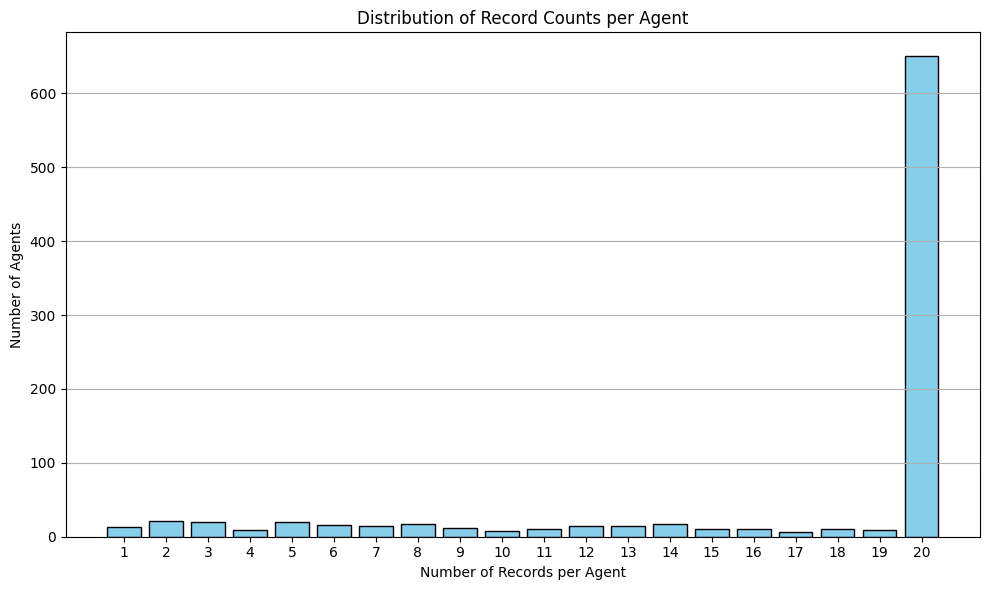

In [159]:
record_counts = df.groupby('agent_code').size()
agent_count_by_record = record_counts.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(agent_count_by_record.index, agent_count_by_record.values, color='skyblue', edgecolor='black')

plt.title('Distribution of Record Counts per Agent')
plt.xlabel('Number of Records per Agent')
plt.ylabel('Number of Agents')
plt.xticks(ticks=range(int(agent_count_by_record.index.min()), int(agent_count_by_record.index.max()) + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Let's analyze `new_policy_count` of the first 20 agents over time.

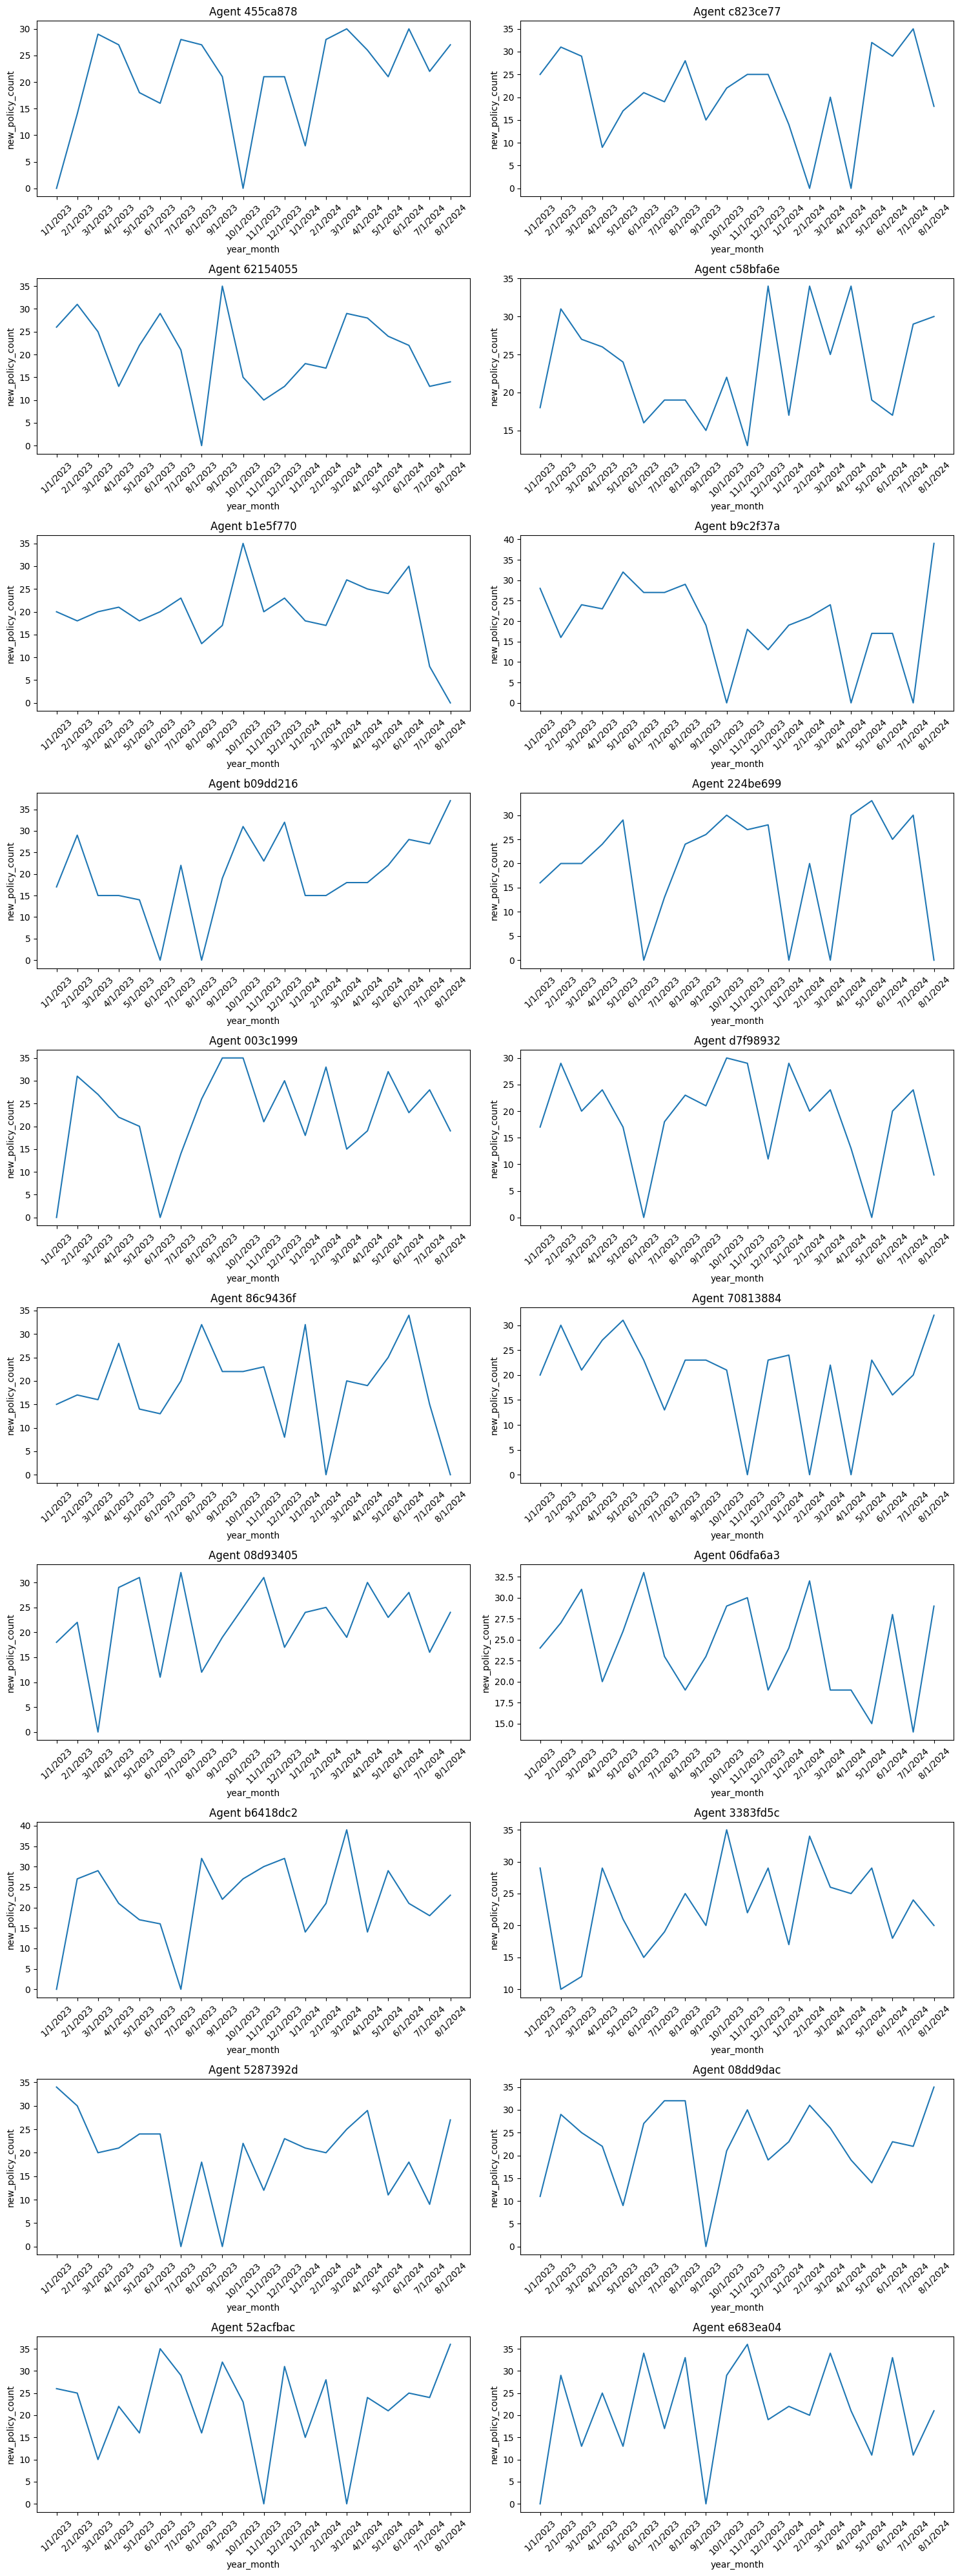

In [160]:
first_20_agents = list(df['agent_code'].unique())[:20]

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 40)) 
axes = axes.flatten() 

for i, agent in enumerate(first_20_agents):
    agent_df = df[df['agent_code'] == agent]
    sns.lineplot(x='year_month', y='new_policy_count', data=agent_df, ax=axes[i])
    axes[i].set_title(f'Agent {agent}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

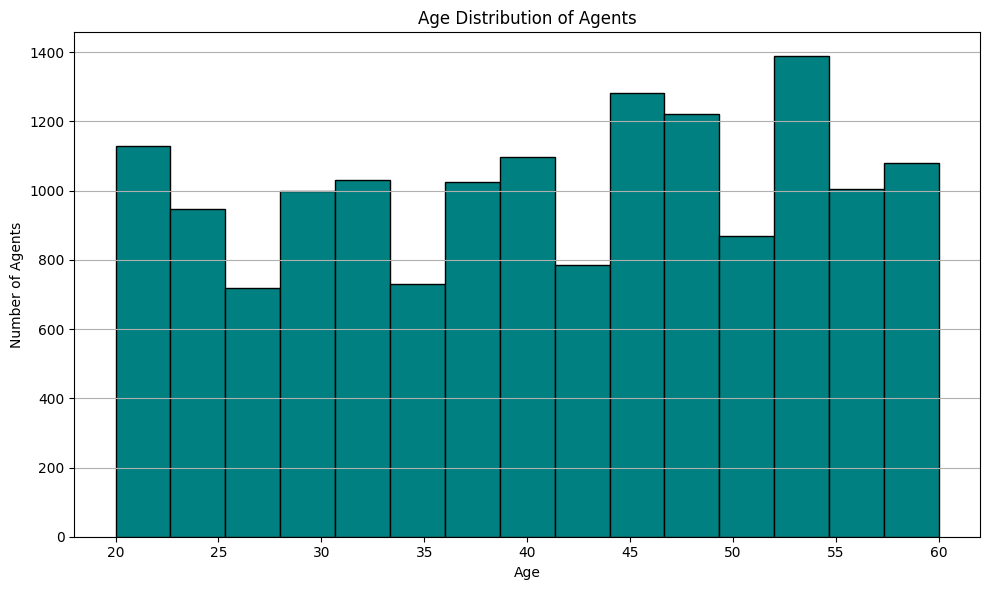

In [161]:
plt.figure(figsize=(10, 6))
plt.hist(df['agent_age'], bins=15, color='teal', edgecolor='black')

plt.title('Age Distribution of Agents')
plt.xlabel('Age')
plt.ylabel('Number of Agents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [162]:
dates_features = ['agent_join_month', 'first_policy_sold_month', 'year_month']

for f in dates_features:
    df[f] = pd.to_datetime(df[f], format='%m/%d/%Y')
    
df

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0           1   455ca878         45       2021-02-01              2023-09-01   
1           2   c823ce77         48       2022-04-01              2024-02-01   
2           3   62154055         53       2020-05-01              2023-09-01   
3           4   c58bfa6e         44       2019-07-01              2022-03-01   
4           5   b1e5f770         20       2020-09-01              2023-02-01   
...       ...        ...        ...              ...                     ...   
15303   15304   d3b44e44         43       2019-04-01              2023-10-01   
15304   15305   0b1d7054         28       2022-09-01              2024-03-01   
15305   15306   51321fa2         45       2021-01-01              2024-04-01   
15306   15307   dd4a0d2d         25       2021-12-01              2023-12-01   
15307   15308   393f3bf6         53       2023-01-01              2024-02-01   

      year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0     2023-01-01                             3                              6   
1     2023-01-01                             1                              4   
2     2023-01-01                             3                              5   
3     2023-01-01                             1                              0   
4     2023-01-01                             0                              6   
...          ...                           ...                            ...   
15303 2024-08-01                             1                              6   
15304 2024-08-01                             1                              5   
15305 2024-08-01                             0                              6   
15306 2024-08-01                             0                              4   
15307 2024-08-01                             1                              4   

       unique_proposals_last_21_days  unique_proposal  ...  unique_quotations  \
0                                  2               12  ...                  9   
1                                 12               21  ...                 14   
2                                  5               17  ...                 14   
3                                 12               17  ...                 11   
4                                 10               17  ...                 13   
...                              ...              ...  ...                ...   
15303                              6               17  ...                 10   
15304                              3               13  ...                 14   
15305                             17               26  ...                 22   
15306                              6               14  ...                 13   
15307                              7               16  ...                  9   

       unique_customers_last_7_days  unique_customers_last_15_days  \
0                                 3                              4   
1                                 4                              3   
2                                 3                              7   
3                                 2                              2   
4                                 3                             10   
...                             ...                            ...   
15303                             3                              4   
15304                             4                              3   
15305                             6                              7   
15306                             6                              3   
15307                             3                              8   

       unique_customers_last_21_days  unique_customers  new_policy_count  \
0                                  8                15                 0   
1                                 10                17                25   
2                              

In [163]:
year_months = df['year_month'].unique()
year_months

<DatetimeArray>
['2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '2023-04-01 00:00:00', '2023-05-01 00:00:00', '2023-06-01 00:00:00',
 '2023-07-01 00:00:00', '2023-08-01 00:00:00', '2023-09-01 00:00:00',
 '2023-10-01 00:00:00', '2023-11-01 00:00:00', '2023-12-01 00:00:00',
 '2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00', '2024-08-01 00:00:00']
Length: 20, dtype: datetime64[ns]

In [164]:
df.columns

Index(['row_id', 'agent_code', 'agent_age', 'agent_join_month',
       'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days',
       'unique_proposals_last_15_days', 'unique_proposals_last_21_days',
       'unique_proposal', 'unique_quotations_last_7_days',
       'unique_quotations_last_15_days', 'unique_quotations_last_21_days',
       'unique_quotations', 'unique_customers_last_7_days',
       'unique_customers_last_15_days', 'unique_customers_last_21_days',
       'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income',
       'number_of_policy_holders', 'number_of_cash_payment_policies'],
      dtype='object')

In [165]:
datetime_features = ['agent_join_month', 'first_policy_sold_month', 'year_month']

for feature in datetime_features:
    df[feature] = pd.to_datetime(df[feature])

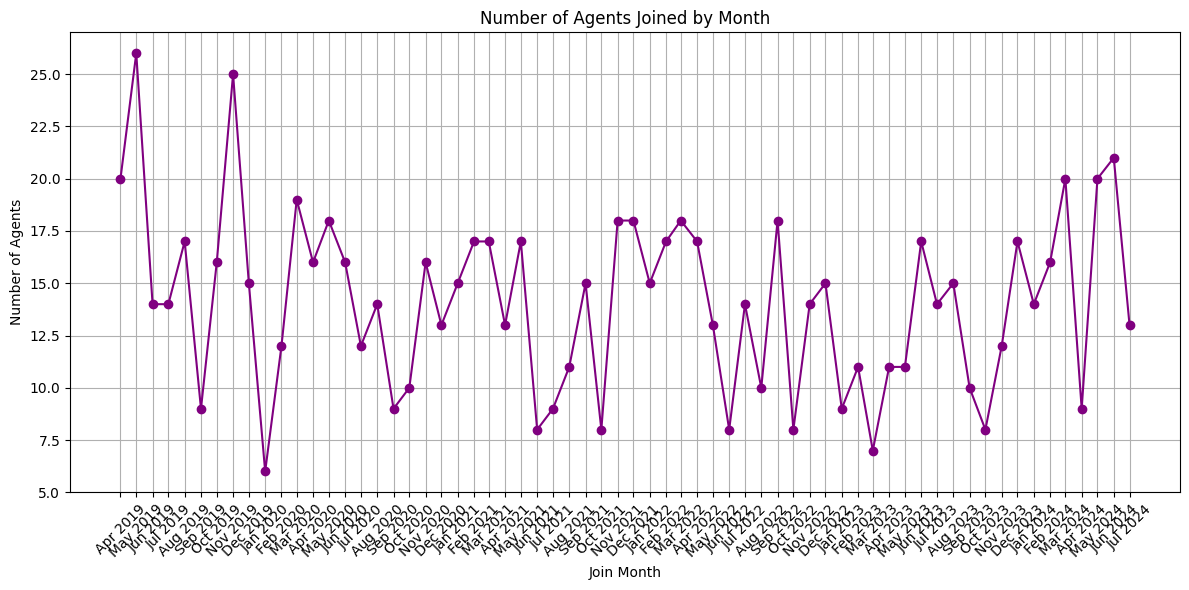

In [166]:
join_data = df.dropna(subset=['agent_join_month'])

unique_agents = join_data[['agent_code', 'agent_join_month']].drop_duplicates()

monthly_joins = unique_agents.groupby('agent_join_month').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_joins.index, monthly_joins.values, marker='o', linestyle='-', color='purple')

plt.title('Number of Agents Joined by Month')
plt.xlabel('Join Month')
plt.ylabel('Number of Agents')
plt.xticks(ticks=monthly_joins.index, labels=monthly_joins.index.strftime('%b %Y'), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

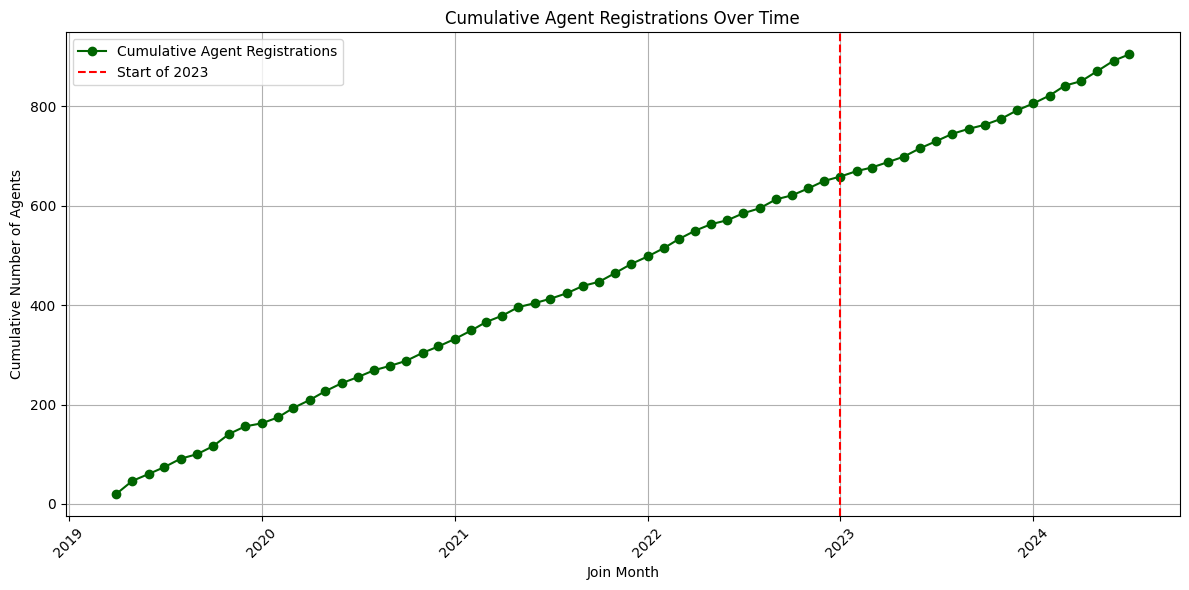

In [167]:
unique_agents = df[['agent_code', 'agent_join_month']].drop_duplicates()

monthly_joins = unique_agents.groupby('agent_join_month').size().sort_index()
cumulative_joins = monthly_joins.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_joins.index, cumulative_joins.values, marker='o', linestyle='-', color='darkgreen', label='Cumulative Agent Registrations')

plt.axvline(pd.Timestamp('2023-01-01'), color='red', linestyle='--', label='Start of 2023')

plt.title('Cumulative Agent Registrations Over Time')
plt.xlabel('Join Month')
plt.ylabel('Cumulative Number of Agents')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

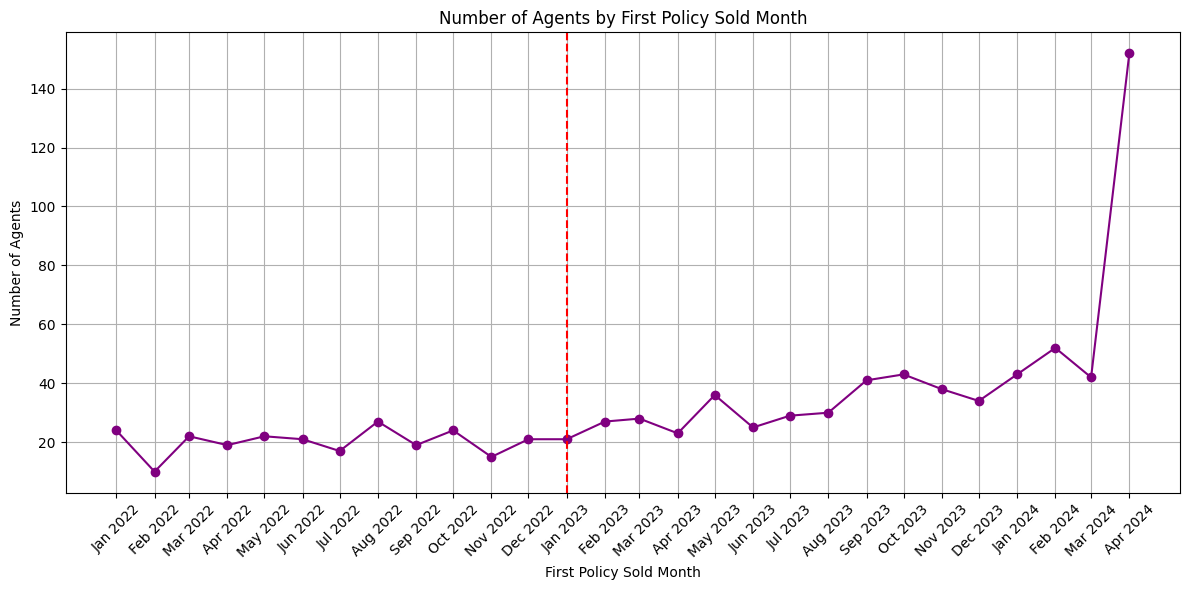

In [168]:
policy_data = df.dropna(subset=['first_policy_sold_month'])
unique_agents = policy_data[['agent_code', 'first_policy_sold_month']].drop_duplicates()
monthly_first_policies = unique_agents.groupby('first_policy_sold_month').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_first_policies.index, monthly_first_policies.values, marker='o', linestyle='-', color='purple')
plt.title('Number of Agents by First Policy Sold Month')
plt.xlabel('First Policy Sold Month')
plt.ylabel('Number of Agents')
plt.axvline(pd.Timestamp('2023-01-01'), color='red', linestyle='--', label='Start of 2023')
plt.xticks(ticks=monthly_first_policies.index, labels=monthly_first_policies.index.strftime('%b %Y'), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

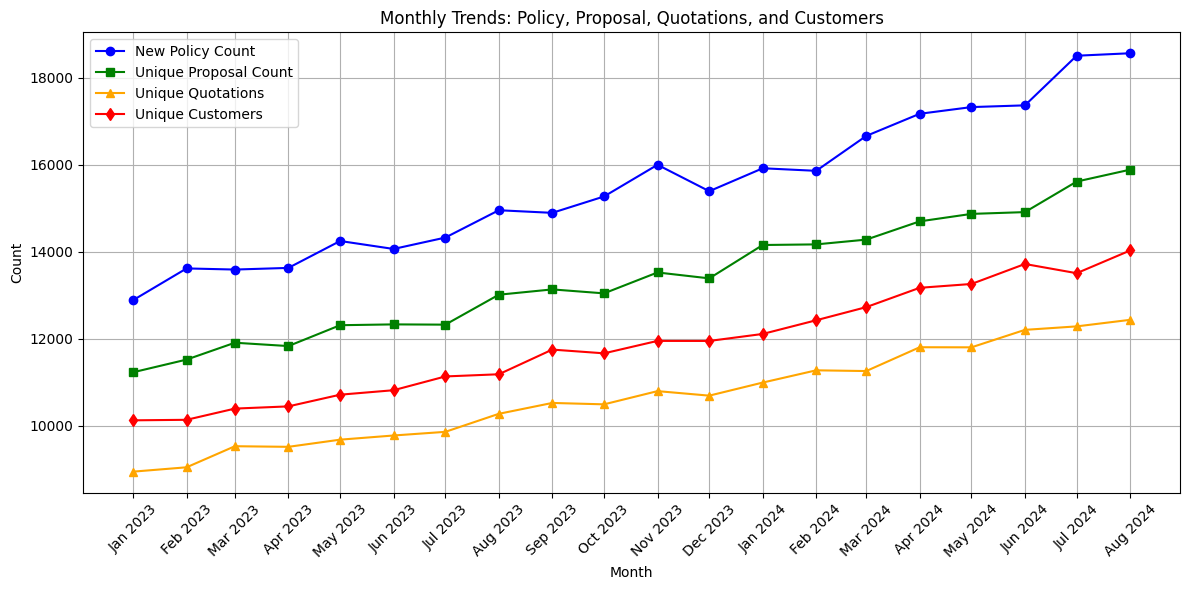

In [169]:
monthly_data = df.groupby('year_month')[['new_policy_count', 'unique_proposal', 'unique_quotations', 'unique_customers']].sum()

plt.figure(figsize=(12, 6))

plt.plot(monthly_data.index, monthly_data['new_policy_count'], marker='o', label='New Policy Count', color='b')
plt.plot(monthly_data.index, monthly_data['unique_proposal'], marker='s', label='Unique Proposal Count', color='g')
plt.plot(monthly_data.index, monthly_data['unique_quotations'], marker='^', label='Unique Quotations', color='orange')
plt.plot(monthly_data.index, monthly_data['unique_customers'], marker='d', label='Unique Customers', color='red')

plt.title('Monthly Trends: Policy, Proposal, Quotations, and Customers')
plt.xlabel('Month')
plt.ylabel('Count')

plt.xticks(ticks=monthly_data.index, labels=monthly_data.index.strftime('%b %Y'), rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


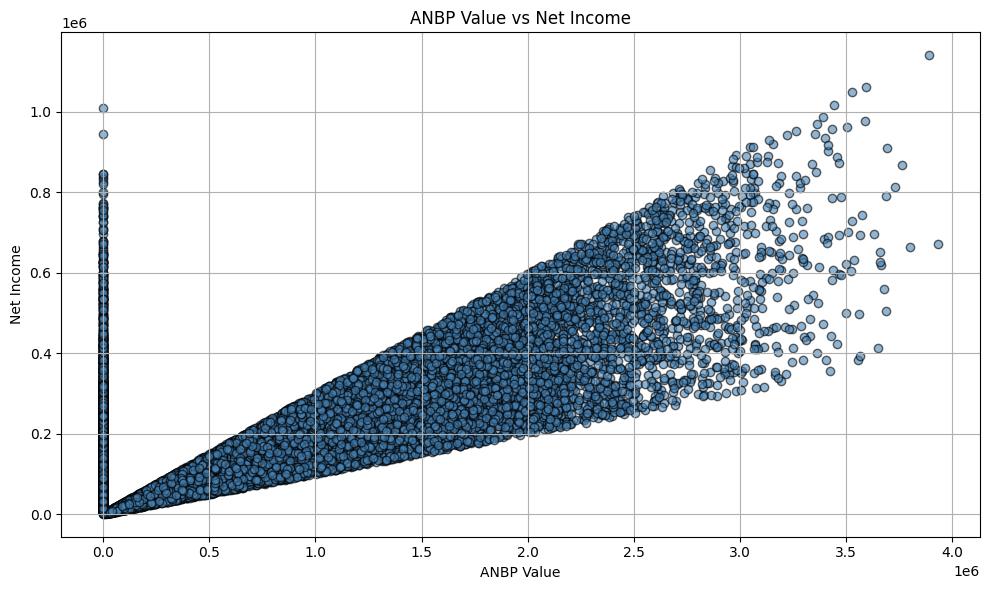

In [170]:
scatter_data = df.dropna(subset=['ANBP_value', 'net_income'])

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['ANBP_value'], scatter_data['net_income'], alpha=0.6, color='steelblue', edgecolor='k')

plt.title('ANBP Value vs Net Income')
plt.xlabel('ANBP Value')
plt.ylabel('Net Income')
plt.grid(True)
plt.tight_layout()
plt.show()

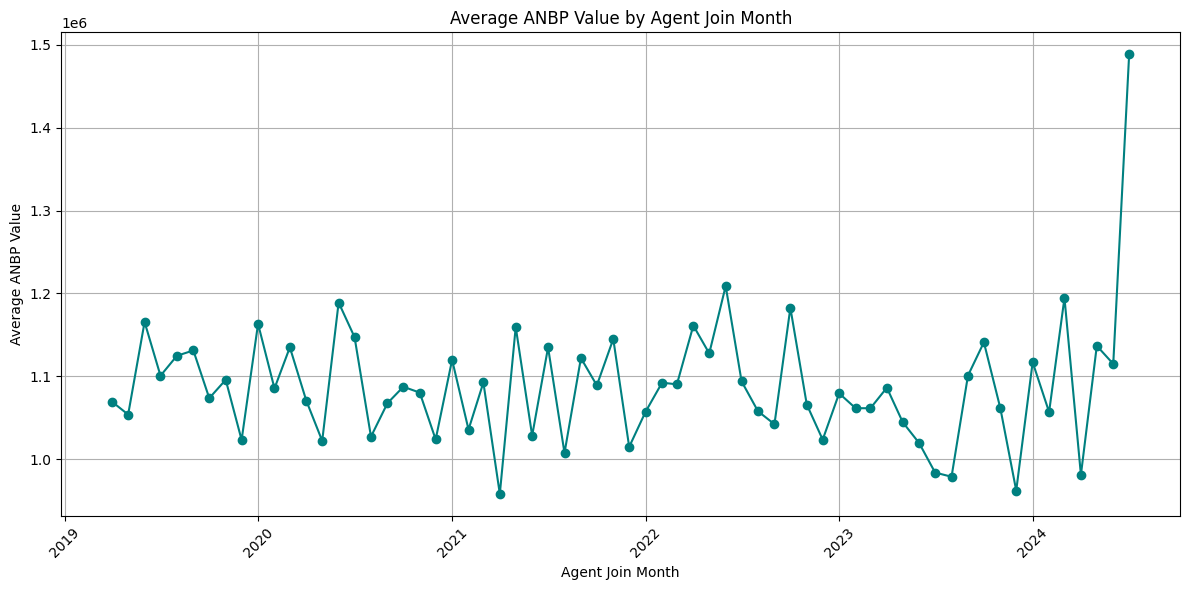

In [171]:
agent_data = df[['agent_code', 'agent_join_month', 'ANBP_value']].drop_duplicates()

avg_anbp_by_join_month = agent_data.groupby('agent_join_month')['ANBP_value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_anbp_by_join_month.index, avg_anbp_by_join_month.values, marker='o', color='teal')

plt.title('Average ANBP Value by Agent Join Month')
plt.xlabel('Agent Join Month')
plt.ylabel('Average ANBP Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


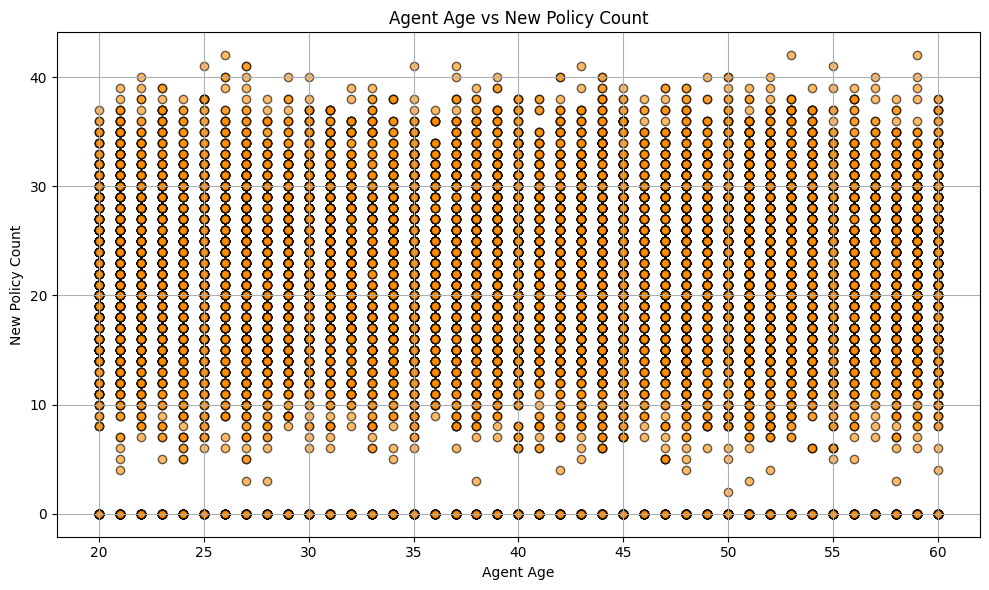

In [172]:
scatter_data = df.dropna(subset=['agent_age', 'new_policy_count'])

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['agent_age'], scatter_data['new_policy_count'], alpha=0.6, color='darkorange', edgecolor='k')

plt.title('Agent Age vs New Policy Count')
plt.xlabel('Agent Age')
plt.ylabel('New Policy Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Create a new feature: `following_new_policy_count`

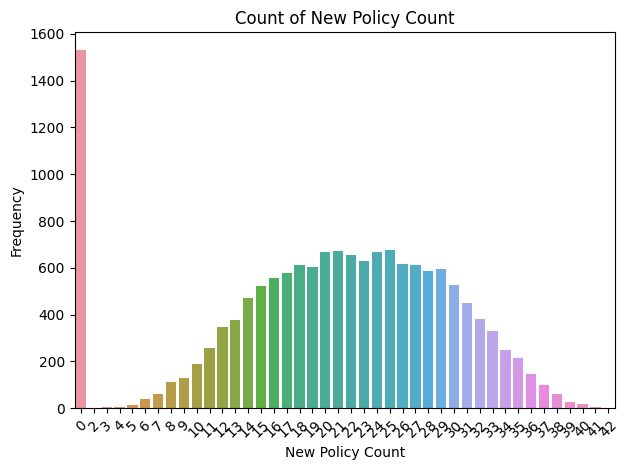

In [173]:
sns.countplot(data=df, x='new_policy_count')
plt.title('Count of New Policy Count')
plt.xlabel('New Policy Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
following_month_dic = {}

for i in range(len(year_months)):
    if i == len(year_months) - 1:
        # this will be reversed later
        following_month_dic[year_months[i]] = year_months[0]
        continue
    following_month_dic[year_months[i]] = year_months[i+1]

following_month_dic

{Timestamp('2023-01-01 00:00:00'): Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'): Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'): Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'): Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'): Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'): Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'): Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'): Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'): Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'): Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'): Timestamp('2023-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'): Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'): Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00'): Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00'):

In [175]:
df['next_month'] = df['year_month'].map(following_month_dic)
df = df.merge(
    df[['agent_code', 'year_month', 'new_policy_count']].rename(
        columns={'year_month': 'next_month', 'new_policy_count': 'following_new_policy_count'}
    ),
    on=['agent_code', 'next_month'],
    how='left'
)
df.drop(columns='next_month', inplace=True)

In [176]:
df

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0           1   455ca878         45       2021-02-01              2023-09-01   
1           2   c823ce77         48       2022-04-01              2024-02-01   
2           3   62154055         53       2020-05-01              2023-09-01   
3           4   c58bfa6e         44       2019-07-01              2022-03-01   
4           5   b1e5f770         20       2020-09-01              2023-02-01   
...       ...        ...        ...              ...                     ...   
15303   15304   d3b44e44         43       2019-04-01              2023-10-01   
15304   15305   0b1d7054         28       2022-09-01              2024-03-01   
15305   15306   51321fa2         45       2021-01-01              2024-04-01   
15306   15307   dd4a0d2d         25       2021-12-01              2023-12-01   
15307   15308   393f3bf6         53       2023-01-01              2024-02-01   

      year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0     2023-01-01                             3                              6   
1     2023-01-01                             1                              4   
2     2023-01-01                             3                              5   
3     2023-01-01                             1                              0   
4     2023-01-01                             0                              6   
...          ...                           ...                            ...   
15303 2024-08-01                             1                              6   
15304 2024-08-01                             1                              5   
15305 2024-08-01                             0                              6   
15306 2024-08-01                             0                              4   
15307 2024-08-01                             1                              4   

       unique_proposals_last_21_days  unique_proposal  ...  \
0                                  2               12  ...   
1                                 12               21  ...   
2                                  5               17  ...   
3                                 12               17  ...   
4                                 10               17  ...   
...                              ...              ...  ...   
15303                              6               17  ...   
15304                              3               13  ...   
15305                             17               26  ...   
15306                              6               14  ...   
15307                              7               16  ...   

       unique_customers_last_7_days  unique_customers_last_15_days  \
0                                 3                              4   
1                                 4                              3   
2                                 3                              7   
3                                 2                              2   
4                                 3                             10   
...                             ...                            ...   
15303                             3                              4   
15304                             4                              3   
15305                             6                              7   
15306                             6                              3   
15307                             3                              8   

       unique_customers_last_21_days  unique_customers  new_policy_count  \
0                                  8                15                 0   
1                                 10                17                25   
2                                 11                21                26   
3                                  9                13                18   
4                                  6                19                20   
...                            

In [178]:
from pandas import Timestamp

df.loc[df['year_month'] == Timestamp('2024-08-01'), 'following_new_policy_count'] = np.nan

In [179]:
temp = df[['agent_code', 'year_month', 'new_policy_count', 'following_new_policy_count']]
temp[temp['agent_code'] == '06dfa6a3']

agent_code year_month  new_policy_count  following_new_policy_count
13      06dfa6a3 2023-01-01                24                        27.0
940     06dfa6a3 2023-02-01                27                        31.0
1819    06dfa6a3 2023-03-01                31                        20.0
2617    06dfa6a3 2023-04-01                20                        26.0
2704    06dfa6a3 2023-05-01                26                        33.0
3986    06dfa6a3 2023-06-01                33                        23.0
4644    06dfa6a3 2023-07-01                23                        19.0
5271    06dfa6a3 2023-08-01                19                        23.0
5886    06dfa6a3 2023-09-01                23                        29.0
6633    06dfa6a3 2023-10-01                29                        30.0
7414    06dfa6a3 2023-11-01                30                        19.0
8405    06dfa6a3 2023-12-01                19                        24.0
8761    06dfa6a3 2024-01-01                24                        32.0
10090   06dfa6a3 2024-02-01                32                        19.0
10785   06dfa6a3 2024-03-01                19                        19.0
11221   06dfa6a3 2024-04-01                19                        15.0
11940   06dfa6a3 2024-05-01                15                        28.0
12843   06dfa6a3 2024-06-01                28                        14.0
13591   06dfa6a3 2024-07-01                14                        29.0
14544   06dfa6a3 2024-08-01                29                         NaN

In [180]:
df.isna().sum()

row_id                               0
agent_code                           0
agent_age                            0
agent_join_month                     0
first_policy_sold_month              0
year_month                           0
unique_proposals_last_7_days         0
unique_proposals_last_15_days        0
unique_proposals_last_21_days        0
unique_proposal                      0
unique_quotations_last_7_days        0
unique_quotations_last_15_days       0
unique_quotations_last_21_days       0
unique_quotations                    0
unique_customers_last_7_days         0
unique_customers_last_15_days        0
unique_customers_last_21_days        0
unique_customers                     0
new_policy_count                     0
ANBP_value                           0
net_income                           0
number_of_policy_holders             0
number_of_cash_payment_policies      0
following_new_policy_count         905
dtype: int64

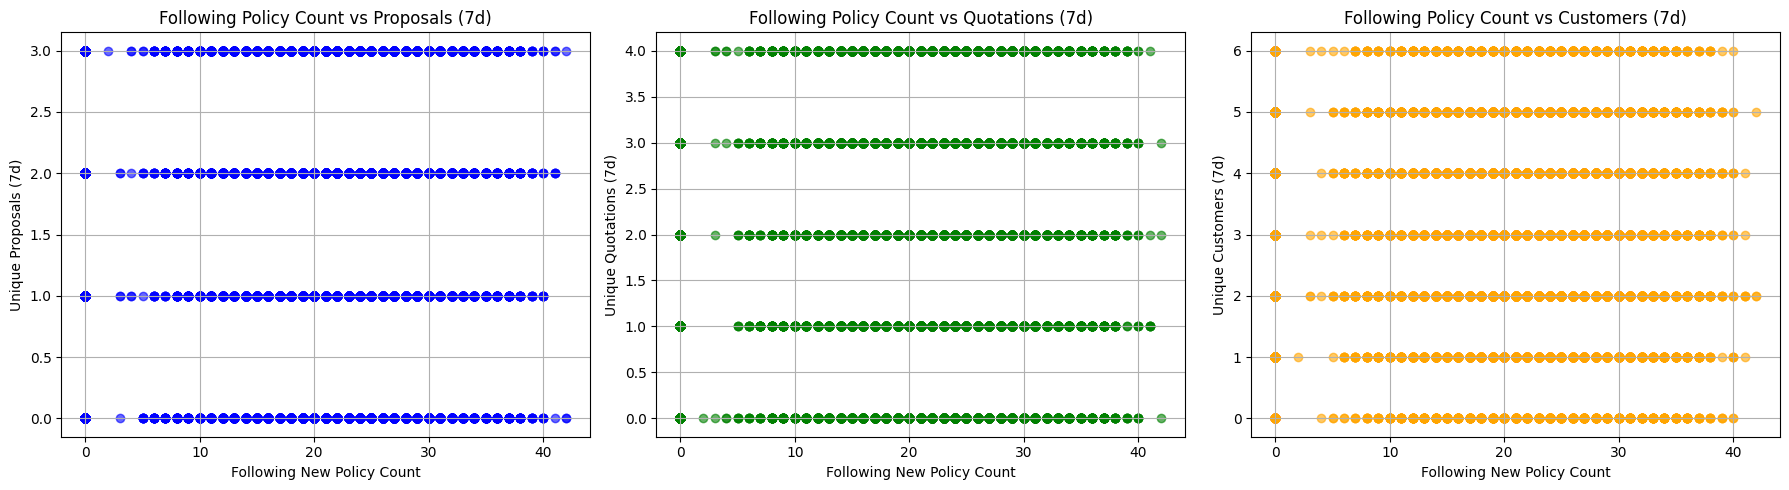

In [181]:
plot_data = df.dropna(subset=[
    'following_new_policy_count',
    'unique_proposals_last_7_days',
    'unique_quotations_last_7_days',
    'unique_customers_last_7_days'
])

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Plot 1: Proposals
axes[0].scatter(plot_data['following_new_policy_count'], plot_data['unique_proposals_last_7_days'],
                alpha=0.6, color='blue')
axes[0].set_title('Following Policy Count vs Proposals (7d)')
axes[0].set_xlabel('Following New Policy Count')
axes[0].set_ylabel('Unique Proposals (7d)')
axes[0].grid(True)

# Plot 2: Quotations
axes[1].scatter(plot_data['following_new_policy_count'], plot_data['unique_quotations_last_7_days'],
                alpha=0.6, color='green')
axes[1].set_title('Following Policy Count vs Quotations (7d)')
axes[1].set_xlabel('Following New Policy Count')
axes[1].set_ylabel('Unique Quotations (7d)')
axes[1].grid(True)

# Plot 3: Customers
axes[2].scatter(plot_data['following_new_policy_count'], plot_data['unique_customers_last_7_days'],
                alpha=0.6, color='orange')
axes[2].set_title('Following Policy Count vs Customers (7d)')
axes[2].set_xlabel('Following New Policy Count')
axes[2].set_ylabel('Unique Customers (7d)')
axes[2].grid(True)

plt.tight_layout()
plt.show()


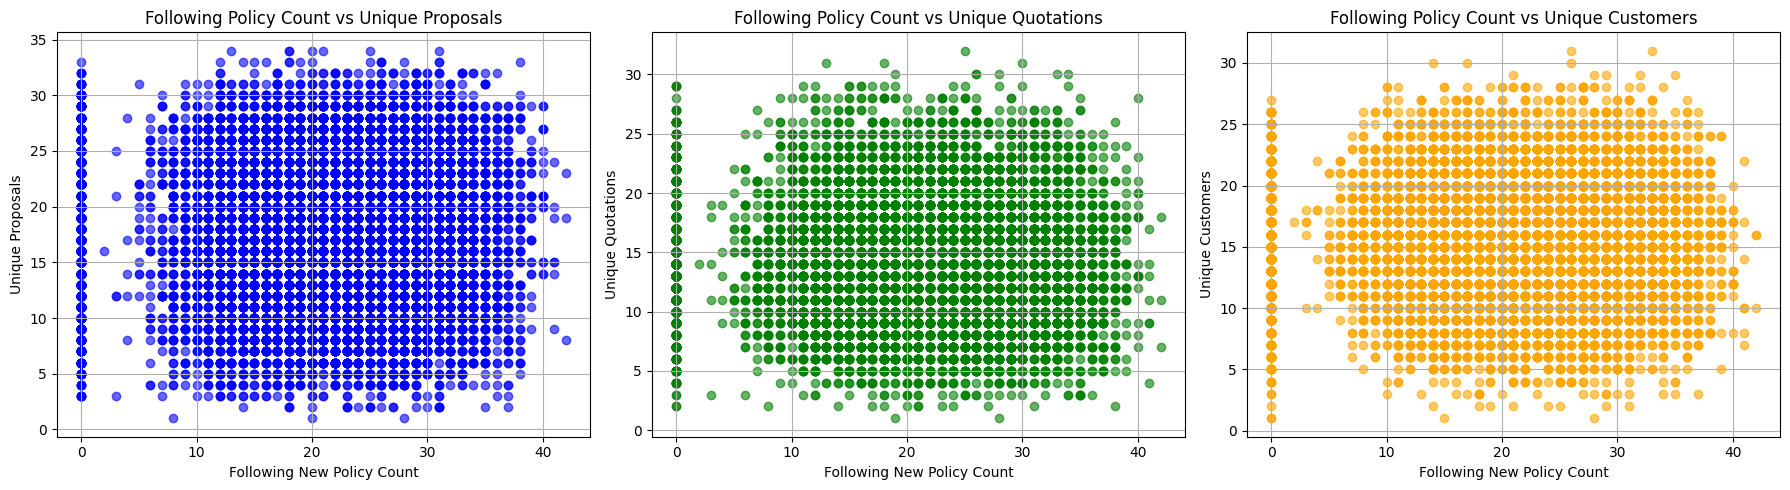

In [182]:
plot_data = df.dropna(subset=[
    'following_new_policy_count',
    'unique_proposal',
    'unique_quotations',
    'unique_customers'
])

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Plot 1: unique_proposal
axes[0].scatter(plot_data['following_new_policy_count'], plot_data['unique_proposal'],
                alpha=0.6, color='blue')
axes[0].set_title('Following Policy Count vs Unique Proposals')
axes[0].set_xlabel('Following New Policy Count')
axes[0].set_ylabel('Unique Proposals')
axes[0].grid(True)

# Plot 2: unique_quotations
axes[1].scatter(plot_data['following_new_policy_count'], plot_data['unique_quotations'],
                alpha=0.6, color='green')
axes[1].set_title('Following Policy Count vs Unique Quotations')
axes[1].set_xlabel('Following New Policy Count')
axes[1].set_ylabel('Unique Quotations')
axes[1].grid(True)

# Plot 3: unique_customers
axes[2].scatter(plot_data['following_new_policy_count'], plot_data['unique_customers'],
                alpha=0.6, color='orange')
axes[2].set_title('Following Policy Count vs Unique Customers')
axes[2].set_xlabel('Following New Policy Count')
axes[2].set_ylabel('Unique Customers')
axes[2].grid(True)

plt.tight_layout()
plt.show()


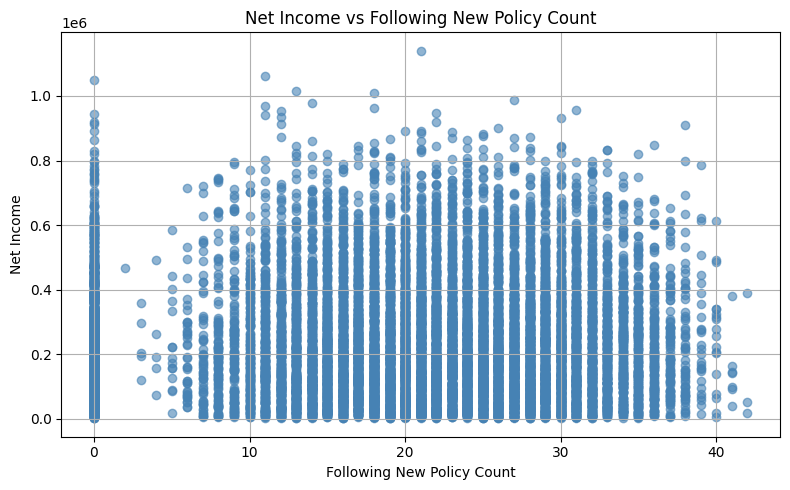

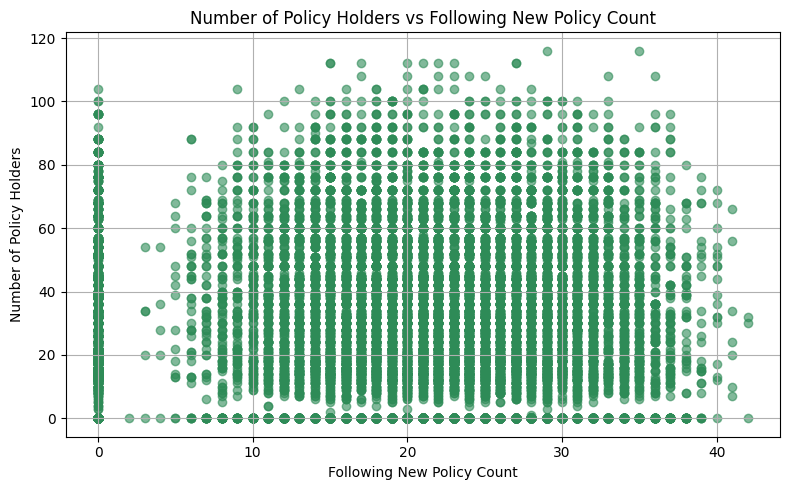

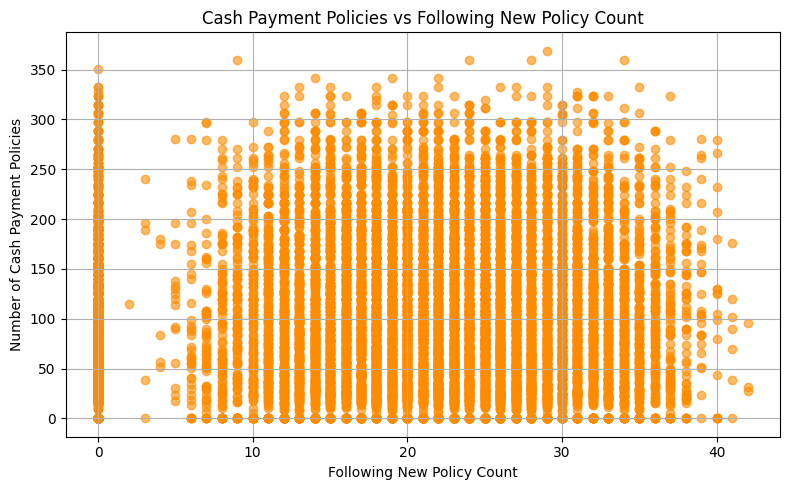

In [183]:
import matplotlib.pyplot as plt

# Drop rows with missing values in the relevant columns
plot_data = df.dropna(subset=[
    'following_new_policy_count',
    'net_income',
    'number_of_policy_holders',
    'number_of_cash_payment_policies'
])

# Plot 1: net_income vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['following_new_policy_count'], plot_data['net_income'], alpha=0.6, color='steelblue')
plt.title('Net Income vs Following New Policy Count')
plt.xlabel('Following New Policy Count')
plt.ylabel('Net Income')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: number_of_policy_holders vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['following_new_policy_count'], plot_data['number_of_policy_holders'], alpha=0.6, color='seagreen')
plt.title('Number of Policy Holders vs Following New Policy Count')
plt.xlabel('Following New Policy Count')
plt.ylabel('Number of Policy Holders')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: number_of_cash_payment_policies vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['following_new_policy_count'], plot_data['number_of_cash_payment_policies'], alpha=0.6, color='darkorange')
plt.title('Cash Payment Policies vs Following New Policy Count')
plt.xlabel('Following New Policy Count')
plt.ylabel('Number of Cash Payment Policies')
plt.grid(True)
plt.tight_layout()
plt.show()


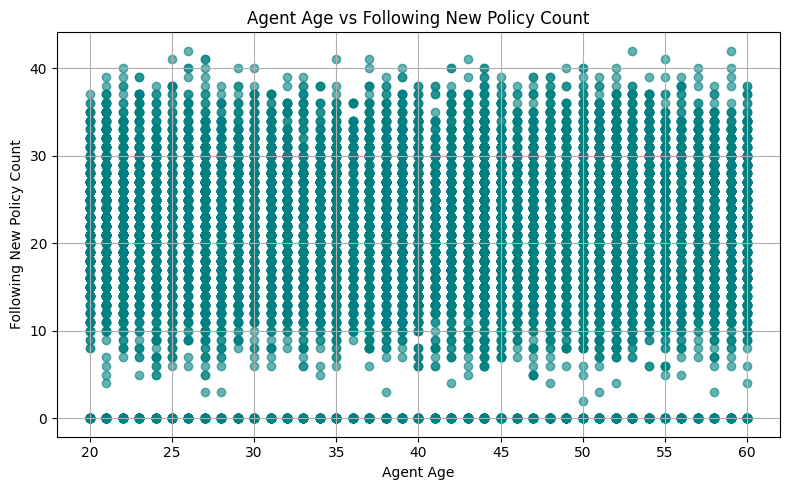

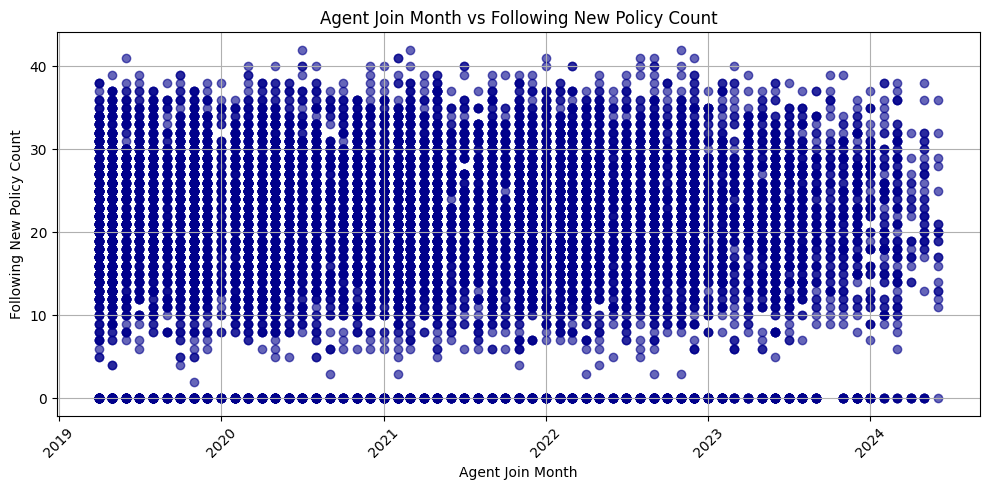

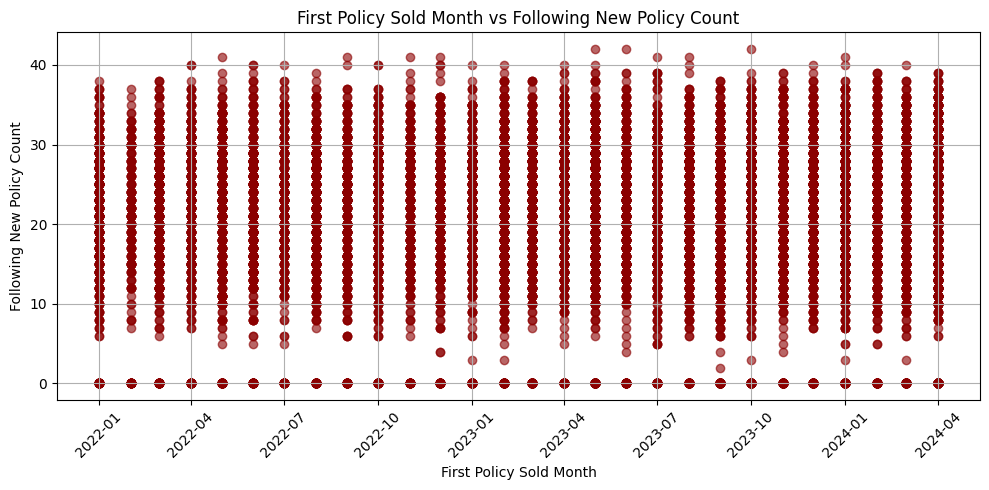

In [184]:
plot_data = df.dropna(subset=[
    'agent_age',
    'agent_join_month',
    'first_policy_sold_month',
    'following_new_policy_count'
])

# Plot 1: agent_age vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['agent_age'], plot_data['following_new_policy_count'], alpha=0.6, color='teal')
plt.title('Agent Age vs Following New Policy Count')
plt.xlabel('Agent Age')
plt.ylabel('Following New Policy Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: agent_join_month vs following_new_policy_count
plt.figure(figsize=(10, 5))
plt.scatter(plot_data['agent_join_month'], plot_data['following_new_policy_count'], alpha=0.6, color='darkblue')
plt.title('Agent Join Month vs Following New Policy Count')
plt.xlabel('Agent Join Month')
plt.ylabel('Following New Policy Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: first_policy_sold_month vs following_new_policy_count
plt.figure(figsize=(10, 5))
plt.scatter(plot_data['first_policy_sold_month'], plot_data['following_new_policy_count'], alpha=0.6, color='darkred')
plt.title('First Policy Sold Month vs Following New Policy Count')
plt.xlabel('First Policy Sold Month')
plt.ylabel('Following New Policy Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


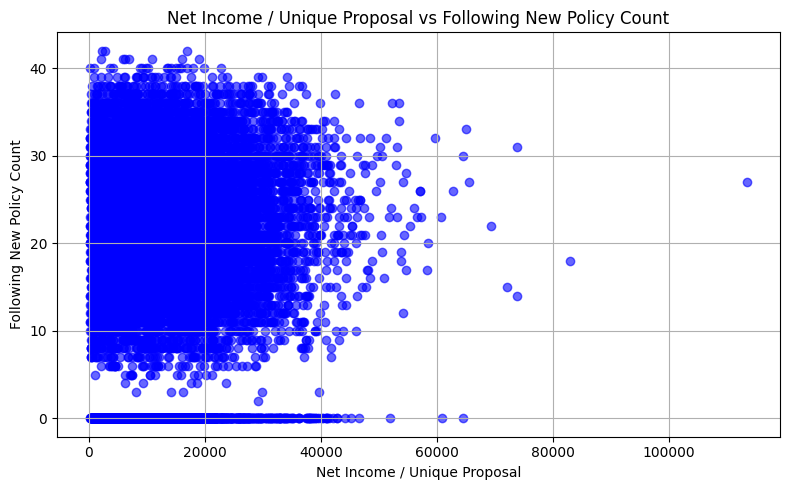

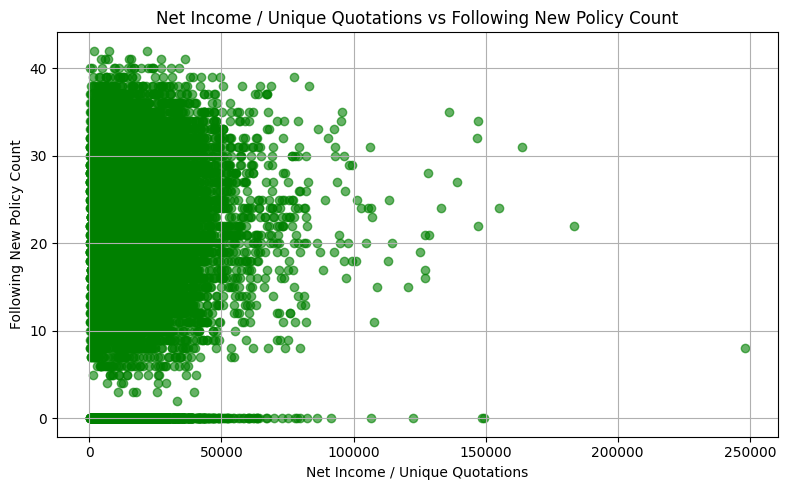

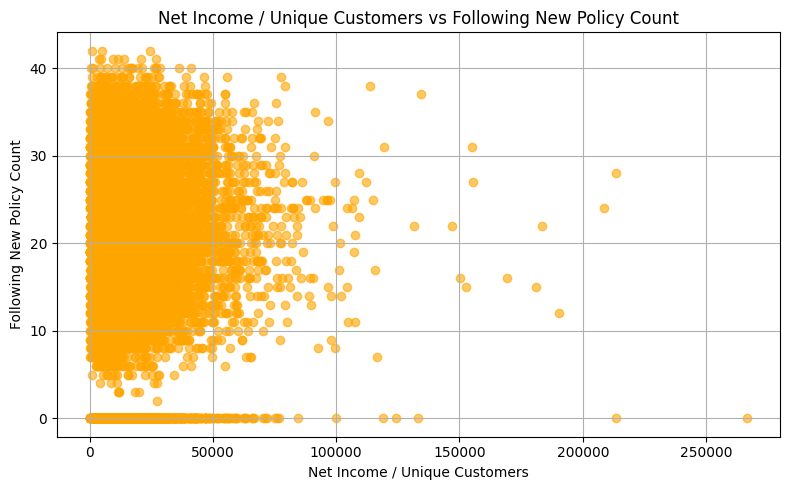

In [185]:
plot_data = df.dropna(subset=[
    'net_income',
    'unique_proposal',
    'unique_quotations',
    'unique_customers',
    'following_new_policy_count'
])

# Plot 1: net_income / unique_proposal vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['net_income'] / plot_data['unique_proposal'], 
            plot_data['following_new_policy_count'], alpha=0.6, color='blue')
plt.title('Net Income / Unique Proposal vs Following New Policy Count')
plt.xlabel('Net Income / Unique Proposal')
plt.ylabel('Following New Policy Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: net_income / unique_quotations vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['net_income'] / plot_data['unique_quotations'], 
            plot_data['following_new_policy_count'], alpha=0.6, color='green')
plt.title('Net Income / Unique Quotations vs Following New Policy Count')
plt.xlabel('Net Income / Unique Quotations')
plt.ylabel('Following New Policy Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: net_income / unique_customers vs following_new_policy_count
plt.figure(figsize=(8, 5))
plt.scatter(plot_data['net_income'] / plot_data['unique_customers'], 
            plot_data['following_new_policy_count'], alpha=0.6, color='orange')
plt.title('Net Income / Unique Customers vs Following New Policy Count')
plt.xlabel('Net Income / Unique Customers')
plt.ylabel('Following New Policy Count')
plt.grid(True)
plt.tight_layout()
plt.show()


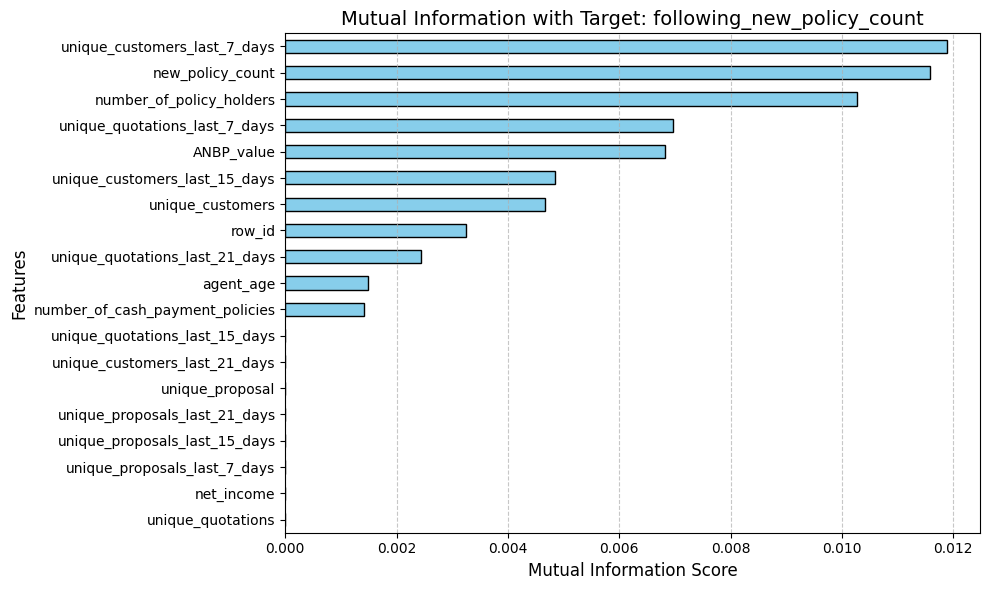

In [186]:
from sklearn.feature_selection import mutual_info_regression

df1 = df.dropna()

X = df1.drop(columns=['agent_code', 'following_new_policy_count', 'agent_join_month','first_policy_sold_month', 'year_month'])
y = df1['following_new_policy_count']

mi = mutual_info_regression(X, y, random_state=0)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
mi_series.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Mutual Information with Target: following_new_policy_count', fontsize=14)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Feature Engineering

In [187]:
df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month

df.drop(columns=['year_month'], inplace=True)

In [188]:
picked_features = [
    'year',
    'month',
    'unique_proposal',
    'unique_proposals_last_7_days',
    'unique_quotations_last_7_days',
    'unique_customers_last_7_days',
    'number_of_cash_payment_policies',
    'unique_customers_last_21_days',
    'new_policy_count',
    'unique_quotations',
    'net_income',
    'unique_customers'
]

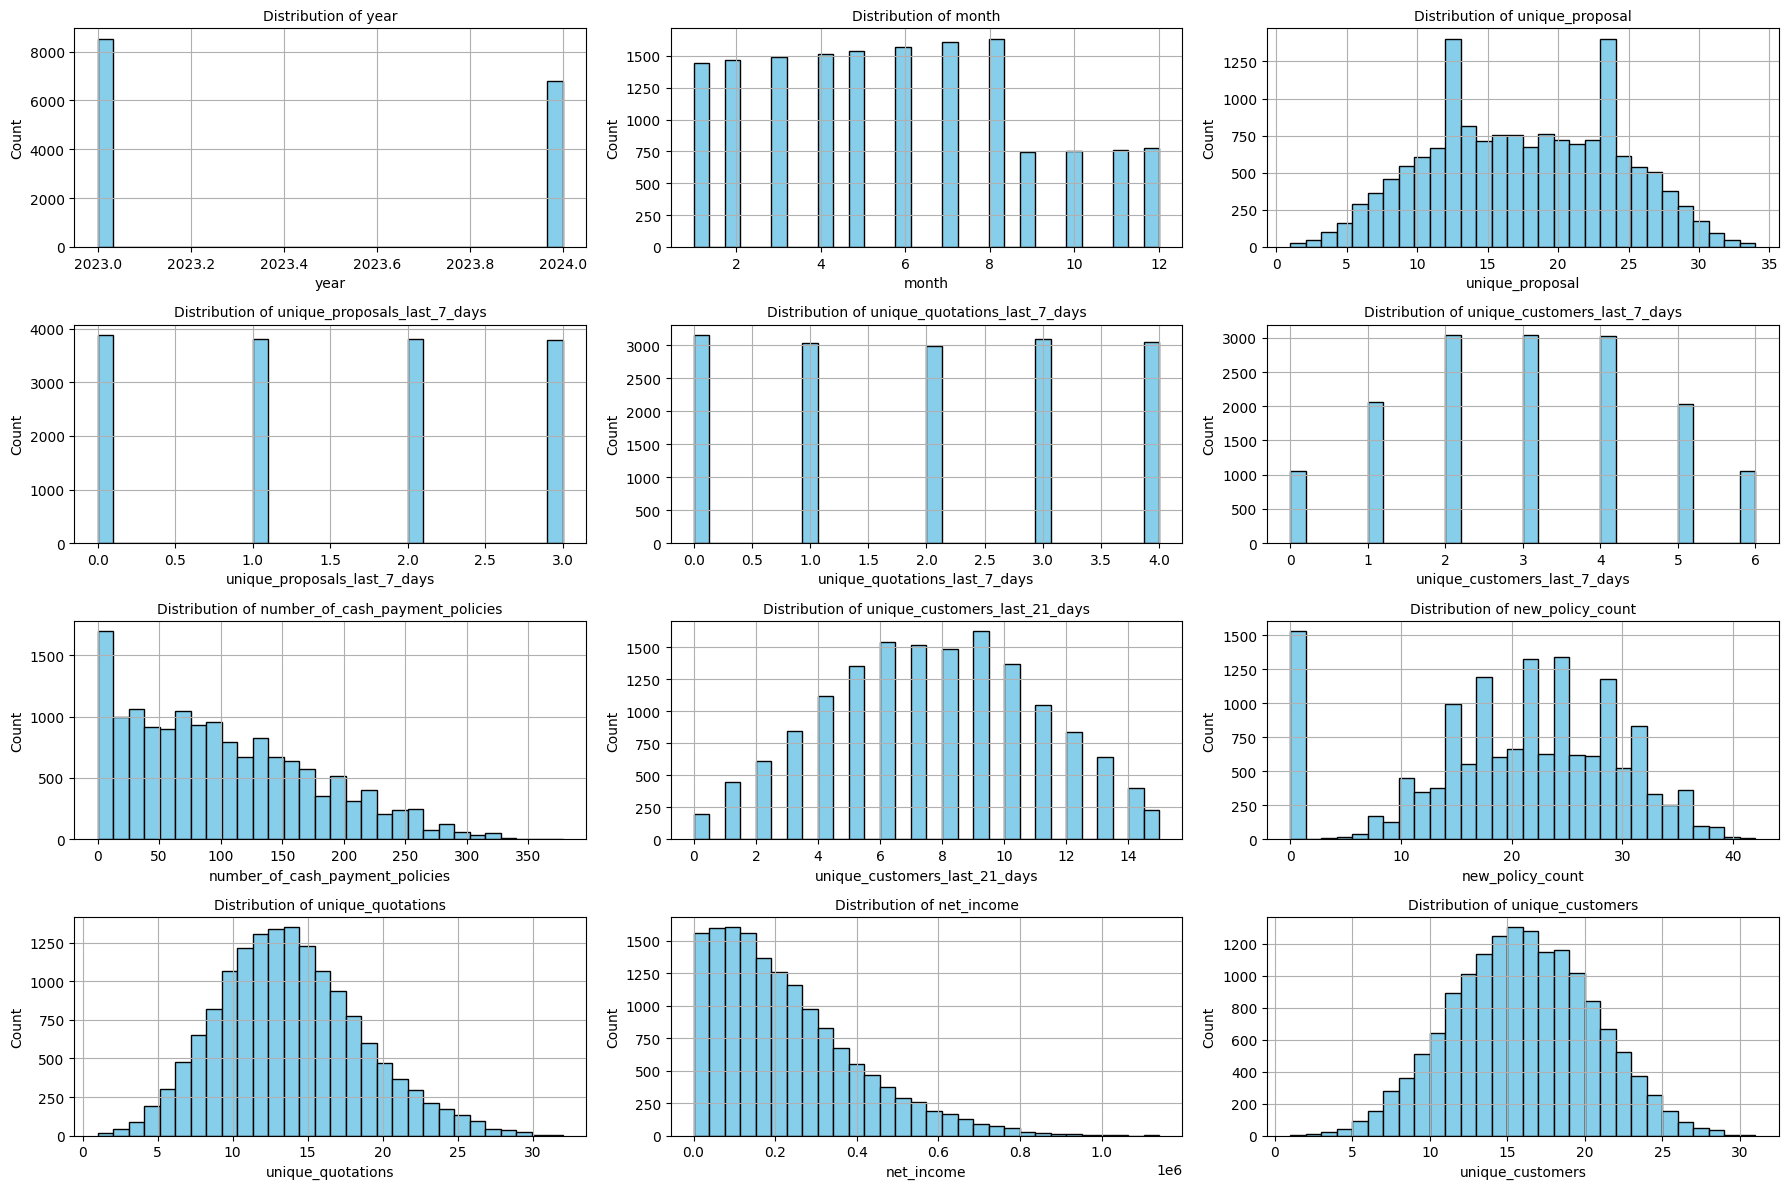

In [189]:
plot_data = df[picked_features].dropna()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(picked_features):
    axes[i].hist(plot_data[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

for j in range(len(picked_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [190]:
df['log_net_income'] = np.log(df['net_income'] + 1)
df['log_number_of_cash_payment_policies'] = np.log(df['number_of_cash_payment_policies'] + 1)

In [191]:
picked_features = [
    'year',
    'month',
    'unique_proposal',
    'unique_proposals_last_7_days',
    'unique_quotations_last_7_days',
    'unique_customers_last_7_days',
    'log_number_of_cash_payment_policies',
    'unique_customers_last_21_days',
    'new_policy_count',
    'unique_quotations',
    'log_net_income',
    'unique_customers'
]

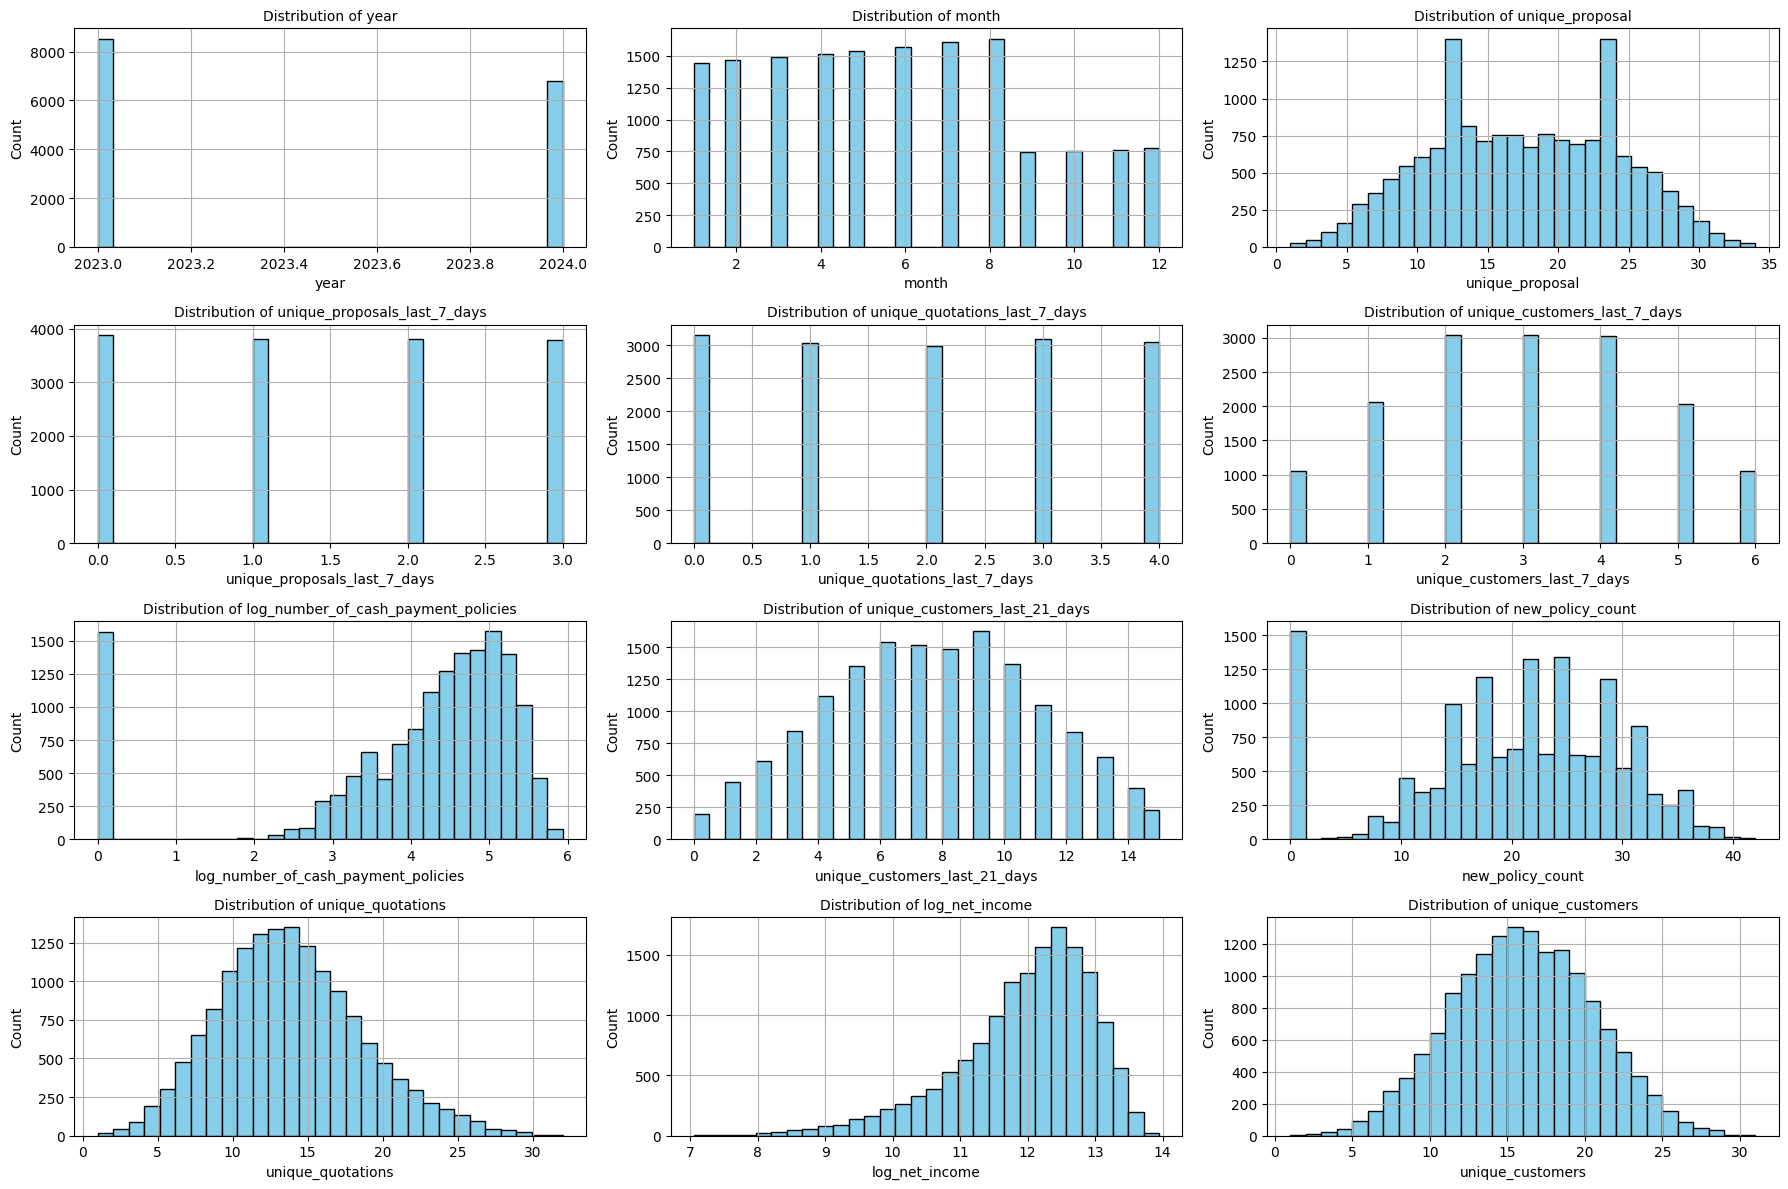

In [192]:
plot_data = df[picked_features].dropna()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(picked_features):
    axes[i].hist(plot_data[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

for j in range(len(picked_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [193]:
clusters = pd.read_csv('/kaggle/input/clusters/agent_clusters.csv')
clusters

agent_code  cluster
0     003c1999        2
1     00d5bda3        2
2     012a3553        1
3     012f0e15        0
4     0177ed5f        1
..         ...      ...
900   ff8edcc9        2
901   ff955d18        0
902   ffca3177        0
903   ffe6c9e9        1
904   fffb525d        0

[905 rows x 2 columns]

In [194]:
df = df.merge(clusters, on='agent_code', how='left')
df.head(20)

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0        1   455ca878         45       2021-02-01              2023-09-01   
1        2   c823ce77         48       2022-04-01              2024-02-01   
2        3   62154055         53       2020-05-01              2023-09-01   
3        4   c58bfa6e         44       2019-07-01              2022-03-01   
4        5   b1e5f770         20       2020-09-01              2023-02-01   
5        6   b9c2f37a         32       2019-10-01              2022-08-01   
6        7   b09dd216         41       2022-03-01              2023-01-01   
7        8   224be699         59       2020-07-01              2023-07-01   
8        9   003c1999         35       2020-08-01              2022-12-01   
9       10   d7f98932         41       2020-03-01              2023-05-01   
10      11   86c9436f         28       2020-04-01              2023-08-01   
11      12   70813884         60       2021-12-01              2024-01-01   
12      13   08d93405         35       2020-02-01              2022-01-01   
13      14   06dfa6a3         39       2019-11-01              2022-03-01   
14      15   b6418dc2         48       2022-12-01              2024-02-01   
15      16   3383fd5c         20       2020-01-01              2023-10-01   
16      17   5287392d         38       2021-11-01              2023-09-01   
17      18   08dd9dac         21       2021-06-01              2022-09-01   
18      19   52acfbac         24       2020-05-01              2022-09-01   
19      20   e683ea04         39       2019-06-01              2024-04-01   

    unique_proposals_last_7_days  unique_proposals_last_15_days  \
0                              3                              6   
1                              1                              4   
2                              3                              5   
3                              1                              0   
4                              0                              6   
5                              2                              2   
6                              1                              6   
7                              3                              0   
8                              2                              2   
9                              0                              6   
10                             1                              1   
11                             1                              0   
12                             0                              4   
13                             3                              6   
14                             2                              0   
15                             2                              4   
16                             3                              4   
17                             3                              4   
18                             0                              0   
19                             0                              1   

    unique_proposals_last_21_days  unique_proposal  \
0                               2               12   
1                              12               21   
2                               5               17   
3                              12               17   
4                              10               17   
5                              16               24   
6                               4               12   
7                               3                8   
8                               0                8   
9                               8               15   
10                              6               13   
11                             10               15   
12                              6               11   
13                             12               22   
14                             13               20   
15                             12               21   
16                             15               26   
17    

In [195]:
picked_features = [
    'year',
    'month',
    'unique_proposal',
    'unique_proposals_last_7_days',
    'unique_quotations_last_7_days',
    'unique_customers_last_7_days',
    'log_number_of_cash_payment_policies',
    'unique_customers_last_21_days',
    'new_policy_count',
    'unique_quotations',
    'log_net_income',
    'unique_customers',
    'cluster'
]

# Model Training

In [196]:
X_train = df[~((df['year'] == 2024) & (df['month'] == 8))][picked_features]
X_test = df[(df['year'] == 2024) & (df['month'] == 8)][picked_features]

y_train = df[~((df['year'] == 2024) & (df['month'] == 8))]['following_new_policy_count']
y_test = pd.merge(
            df[(df['year'] == 2024) & (df['month'] == 8)][picked_features+['agent_code']],
            test,
            how='left',
            on='agent_code'
        )['new_policy_count_y']

In [197]:
X_train.shape

(14403, 13)

In [198]:
y_train.shape[0]

14403

In [199]:
X_test.shape

(905, 13)

In [200]:
y_test.shape[0]

905

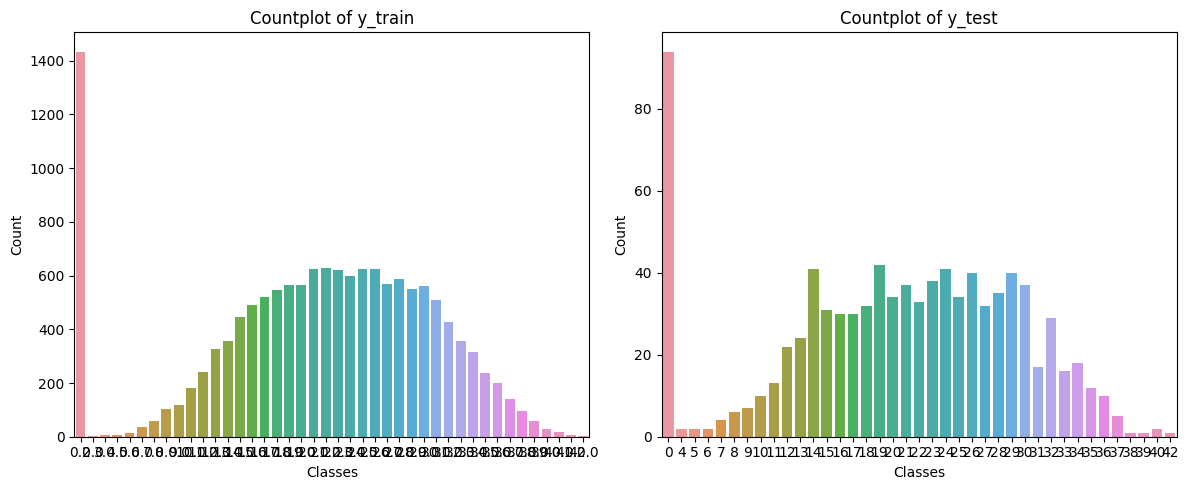

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Countplot of y_train')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Count')

sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Countplot of y_test')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

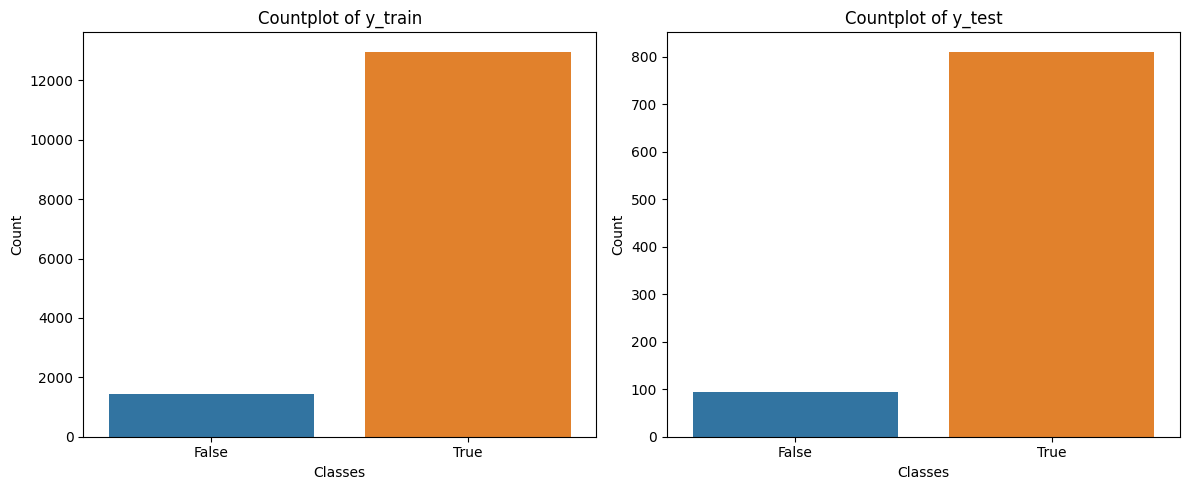

In [204]:
y_test1 = y_test != 0
y_train1 = y_train != 0

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train1, ax=axes[0])
axes[0].set_title('Countplot of y_train')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Count')

sns.countplot(x=y_test1, ax=axes[1])
axes[1].set_title('Countplot of y_test')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [210]:
y_test = y_test1.astype(int)
y_train = y_train1.astype(int)

In [215]:
len(y_test[y_test == 0])/len(y_test) * 100

10.386740331491714

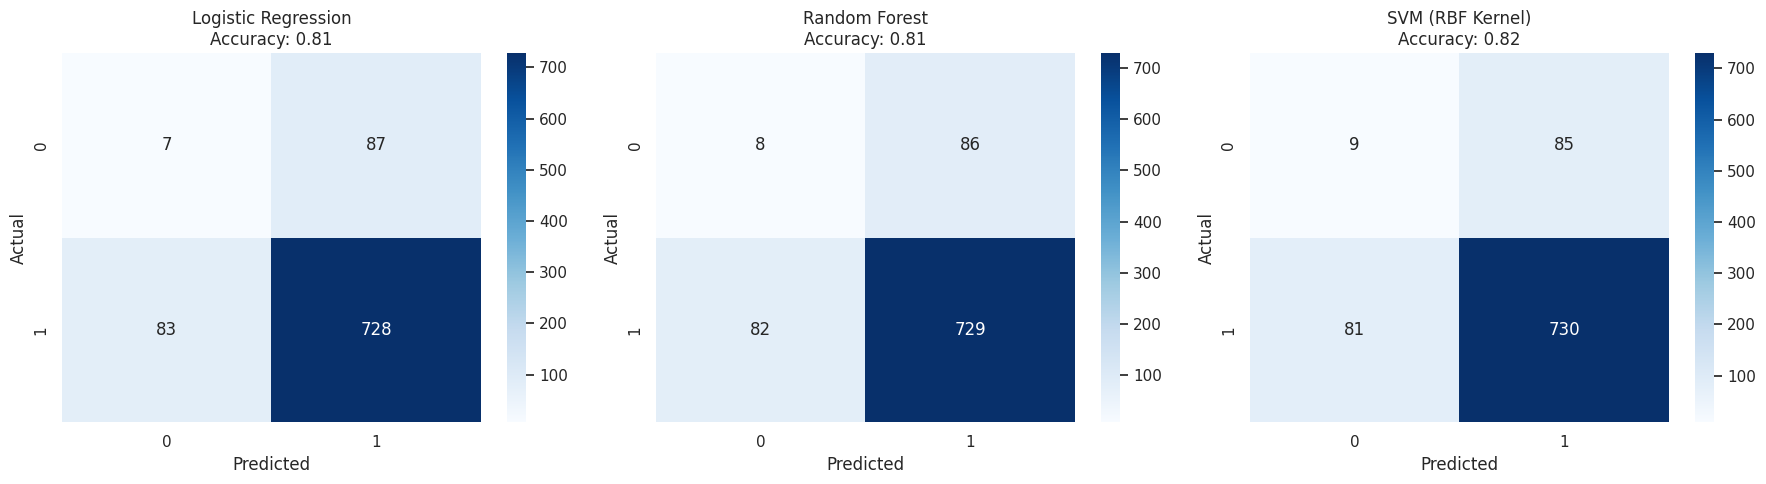

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Define models (must support probability or score output)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)  # Set probability=True to use predict_proba
}

# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    # Use predict_proba for probabilistic scores
    probs = model.predict_proba(X_test)[:, 0]  # Probabilities of class 0

    # Force 10% of predictions to be class 0
    n = int(0.10 * len(probs))
    threshold_indices = np.argsort(probs)[-n:]
    y_pred = np.ones_like(y_test)  # default class 1
    y_pred[threshold_indices] = 0

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{name}\nAccuracy: {acc:.2f}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [220]:
X_train = df[~((df['year'] == 2024) & (df['month'] == 8))][picked_features]
X_test = df[(df['year'] == 2024) & (df['month'] == 8)][picked_features]

y_train = df[~((df['year'] == 2024) & (df['month'] == 8))]['following_new_policy_count']
y_test = pd.merge(
            df[(df['year'] == 2024) & (df['month'] == 8)][picked_features+['agent_code']],
            test,
            how='left',
            on='agent_code'
        )['new_policy_count_y']

Full Evaluation Results:
                          MAE       RMSE        R²  % Error < 5
Linear Regression   7.719274   9.688236 -0.005469    38.895028
Random Forest       7.890055   9.839003 -0.037006    37.679558
SVR                 7.670831   9.712961 -0.010607    39.889503
KNN                 8.282210  10.432120 -0.165801    37.127072
Decision Tree      11.321547  14.036417 -1.110530    23.867403

✅ Models meeting the ≥10% predictions with error < 5 condition:
                          MAE       RMSE        R²  % Error < 5
Linear Regression   7.719274   9.688236 -0.005469    38.895028
Random Forest       7.890055   9.839003 -0.037006    37.679558
SVR                 7.670831   9.712961 -0.010607    39.889503
KNN                 8.282210  10.432120 -0.165801    37.127072
Decision Tree      11.321547  14.036417 -1.110530    23.867403


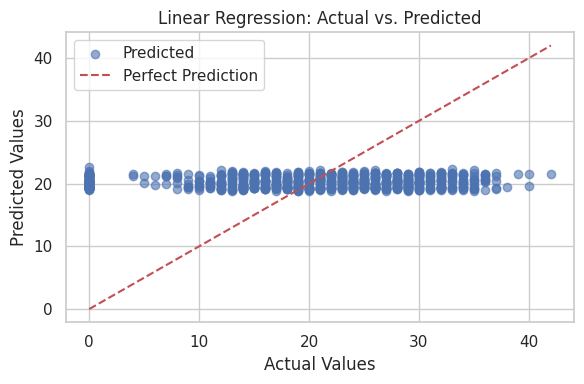

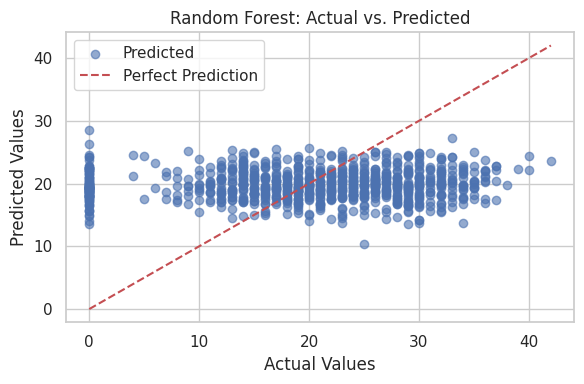

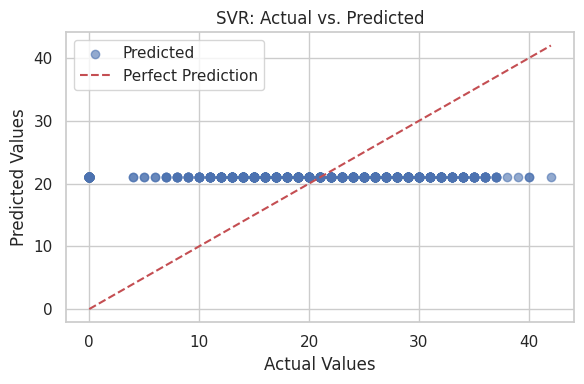

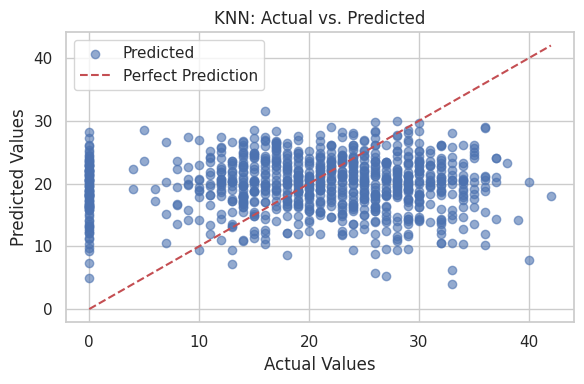

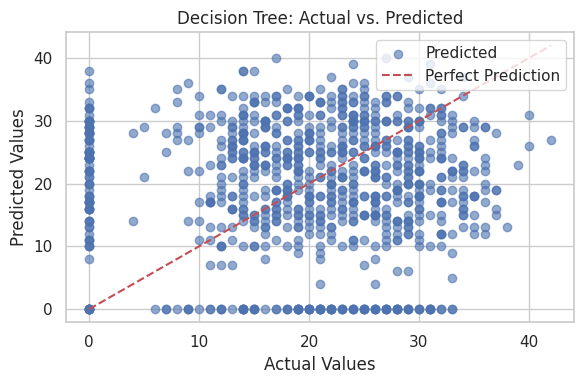

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Dictionary of candidate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Store results
results = {}
passed_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Error metrics
    abs_errors = np.abs(preds - y_test)
    pct_below_5 = np.mean(abs_errors < 5) * 100
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    # Store all results
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "% Error < 5": pct_below_5
    }

    # Apply strict filter
    if pct_below_5 >= 10.0:
        passed_models[name] = preds

# Display all results
results_df = pd.DataFrame(results).T
print("Full Evaluation Results:\n", results_df)

# Filtered valid models
valid_models_df = results_df[results_df["% Error < 5"] >= 10.0]
print("\n✅ Models meeting the ≥10% predictions with error < 5 condition:\n", valid_models_df)

# Plot only valid models
for name, preds in passed_models.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, preds, alpha=0.6, label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
    plt.title(f"{name}: Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Submission

In [255]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [274]:
def find_clusters(df):
    agent_summary = df.groupby('agent_code').agg({
        'agent_age': 'first',
        'new_policy_count': ['mean', 'sum'],
        'ANBP_value': 'mean',
        'net_income': 'mean',
        'number_of_policy_holders': 'last',
        'number_of_cash_payment_policies': 'mean',
        'unique_proposals_last_7_days': 'mean',
        'unique_proposals_last_15_days': 'mean',
        'unique_proposals_last_21_days': 'mean',
        'unique_proposal': 'mean',
        'unique_quotations_last_7_days': 'mean',
        'unique_quotations_last_15_days': 'mean',
        'unique_quotations_last_21_days': 'mean',
        'unique_quotations': 'mean',
        'unique_customers_last_7_days': 'mean',
        'unique_customers_last_15_days': 'mean',
        'unique_customers_last_21_days': 'mean',
        'unique_customers': 'mean'
    }).reset_index()
    
    agent_summary.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col 
                             for col in agent_summary.columns]
    
    agent_trends = []
    for agent, group in df.groupby('agent_code'):
        group = group.sort_values('year_month')
        X = np.arange(len(group)).reshape(-1, 1)
        y = group['new_policy_count'].values
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        agent_trends.append({'agent_code': agent, 'performance_slope': slope})
    
    trend_df = pd.DataFrame(agent_trends)
    agent_summary = agent_summary.merge(trend_df, on='agent_code')
    
    anomaly_features = [
        'new_policy_count', 'ANBP_value', 'net_income',
        'unique_proposals_last_7_days', 'unique_quotations_last_7_days',
        'unique_customers_last_7_days', 'number_of_policy_holders',
        'number_of_cash_payment_policies'
    ]
    
    anomaly_threshold = 2  
    agent_anomaly_counts = []
    
    for agent, group in df.groupby('agent_code'):
        count = 0  
        for feature in anomaly_features:
            mean = group[feature].mean()
            std = group[feature].std()
            if std == 0 or pd.isna(std):
                continue  
            anomalies = group[
                (group[feature] > mean + anomaly_threshold * std) |
                (group[feature] < mean - anomaly_threshold * std)
            ]
            count += len(anomalies)
        agent_anomaly_counts.append({'agent_code': agent, 'anomaly_count': count})
    
    anomaly_df = pd.DataFrame(agent_anomaly_counts)
    agent_summary = agent_summary.merge(anomaly_df, on='agent_code')
    
    features = agent_summary.drop(columns=['agent_code'])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans = KMeans(n_clusters=3, random_state=42)
    agent_summary['cluster'] = kmeans.fit_predict(scaled_features)
    
    return agent_summary[['agent_code', 'cluster']]

In [275]:
def preprocess_dates(df):
    """Convert date columns."""
    dates_features = ['agent_join_month', 'first_policy_sold_month', 'year_month']
    for feature in dates_features:
        df[feature] = pd.to_datetime(df[feature], format='%m/%d/%Y')
    return df

In [276]:
def create_following_month_data(df):
    """Add following month features."""
    year_months = df['year_month'].unique()
    this_month = year_months.max()
    following_month_dic = {year_months[i]: year_months[(i + 1) % len(year_months)] for i in range(len(year_months))}
    df['next_month'] = df['year_month'].map(following_month_dic)
    df = df.merge(
        df[['agent_code', 'year_month', 'new_policy_count']].rename(
            columns={'year_month': 'next_month', 'new_policy_count': 'following_new_policy_count'}
        ),
        on=['agent_code', 'next_month'],
        how='left'
    )
    df.drop(columns='next_month', inplace=True)
    df.loc[df['year_month'] == this_month, 'following_new_policy_count'] = np.nan
    df['year'] = df['year_month'].dt.year
    df['month'] = df['year_month'].dt.month
    df.drop(columns=['year_month'], inplace=True)
    return df, this_month

In [277]:
def engineer_features(df):
    """Add log features."""
    df['log_net_income'] = np.log(df['net_income'] + 1)
    df['log_number_of_cash_payment_policies'] = np.log(df['number_of_cash_payment_policies'] + 1)
    return df

In [278]:
def split_train_test(df, this_month):
    """Split into train/test sets."""
    picked_features = [
        'year', 'month', 'unique_proposal', 'unique_proposals_last_7_days',
        'unique_quotations_last_7_days', 'unique_customers_last_7_days',
        'log_number_of_cash_payment_policies', 'unique_customers_last_21_days',
        'new_policy_count', 'unique_quotations', 'log_net_income', 'unique_customers', 'cluster'
    ]
    current_month_mask = (df['year'] == this_month.year) & (df['month'] == this_month.month)
    X_train = df[~current_month_mask][picked_features]
    X_test = df[current_month_mask][picked_features]
    y_train = (df[~current_month_mask]['following_new_policy_count'] != 0).astype(int)
    return X_train, X_test, y_train

In [279]:
def train_and_predict(X_train, X_test, y_train, threshold=0.10):
    """Train SVM and predict."""
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 0]
    n = int(threshold * len(probs))
    threshold_indices = np.argsort(probs)[-n:]
    y_pred = np.ones(len(probs), dtype=int)
    y_pred[threshold_indices] = 0
    return y_pred

In [324]:
def make_submission(y_pred):
    row_numbers = [i + 1 for i in range(len(y_pred))]
    submission = pd.DataFrame({
        'row_id': row_numbers,
        'target_column': y_pred
    })
    return submission

In [325]:
def make_predictions(df):
    """Run full pipeline."""
    clusters = find_clusters(df)
    df = df.merge(clusters, on='agent_code', how='left')
    
    df = preprocess_dates(df)
    df, this_month = create_following_month_data(df)
    df = engineer_features(df)
    X_train, X_test, y_train = split_train_test(df, this_month)
    y_pred = train_and_predict(X_train, X_test, y_train)
    return make_submission(y_pred)

In [290]:
df = pd.read_csv('/kaggle/input/data-storm-6-0/train_storming_round.csv')
test = pd.read_csv('/kaggle/input/data-storm-6-0/test_storming_round.csv')

full_df = pd.concat([df, test], axis=0, ignore_index=True)

In [291]:
predictions = make_predictions(full_df)

In [292]:
len(predictions)

914

In [293]:
predictions.head()

row_id  row_numbers
0       1            1
1       2            1
2       3            1
3       4            1
4       5            1

In [294]:
predictions.to_csv('submission.csv', index=False)

#  :)